In [1]:
import warnings
import numpy as np
warnings.filterwarnings("ignore")
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

In [2]:
df = pd.read_excel('C:\Deepak\Imarticus\Capstone Project\Sales_Forecast_Data1.xlsx')

In [3]:
df.isnull().sum()

FIN_YEAR    0
MONTH       0
STATE       0
FG          0
DISTRICT    0
COMPANY     0
VALUE       0
dtype: int64

In [4]:
df.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE
0,2014-2015,Nov,Haryana,Insecticides,Rohtak,monous,675.00
1,2014-2015,Nov,Haryana,Insecticides,Rewari,monous,73.71
2,2014-2015,Nov,Haryana,Insecticides,Gurgaon,monous,405.00
3,2014-2015,Nov,Haryana,Insecticides,Mewat,monous,1188.00
4,2014-2015,Nov,Haryana,Insecticides,Palwal,monous,5188.59


In [5]:
df['FG'].value_counts()

Herbicides      57538
Insecticides    57538
Bactericides    57538
Rodenticides    57538
Name: FG, dtype: int64

In [6]:
df['COMPANY'].value_counts()

ABC Manufacturing    28640
trita                22744
cynoid               20800
disescent            17012
interosis            14288
idiombee             13904
exicious             12992
unimm                10184
scire                10152
zooloo               10032
unent                 9760
janu                  9432
hemify                7924
venible               7844
socimbee              6812
monous                4888
kadoo                 4272
flimbo                3476
intravu               3460
agizu                 2700
archile               1428
esose                 1056
munder                 820
dominive               580
suroid                 544
inent                  536
alboid                 512
yore                   468
biore                  464
hypomba                380
insulescent            328
centicee               240
falcize                240
oyofix                 220
ament                  212
canill                 200
luper                  116
t

# Processing of Data

In [7]:
import statistics

In [8]:
df["VALUE"].mean()

704.9735922298803

In [9]:
df2 = df.groupby([df['COMPANY'],df['FIN_YEAR'],df['FG'],df['MONTH']]).mean()

In [10]:
print(df2)

                                                    VALUE
COMPANY           FIN_YEAR  FG           MONTH           
ABC Manufacturing 2014-2015 Bactericides Apr      0.00000
                                         Aug      0.00000
                                         Dec      0.00000
                                         Feb      0.00000
                                         Jan      0.00000
...                                                   ...
zooloo            2017-2018 Rodenticides Jun      0.00000
                                         May      0.00000
                                         Nov    446.97629
                                         Oct    369.13800
                                         Sep      0.00000

[4200 rows x 1 columns]


In [11]:
df1 = df[df["VALUE"]!=0]

In [12]:
df1 = df[df["VALUE"]!=0].mean()

In [13]:
print(df1)

VALUE    1914.602594
dtype: float64


In [14]:
df1 = df[df["VALUE"]!=0].groupby([df['COMPANY'],df['FIN_YEAR'],df['FG'],df['MONTH']]).mean()

In [15]:
df1 = df1.reset_index()

In [16]:
print(df1)

                COMPANY   FIN_YEAR            FG MONTH        VALUE
0     ABC Manufacturing  2014-2015    Herbicides   Apr   181.392857
1     ABC Manufacturing  2014-2015    Herbicides   Aug  1044.978896
2     ABC Manufacturing  2014-2015    Herbicides   Dec  1311.044400
3     ABC Manufacturing  2014-2015    Herbicides   Feb   802.225976
4     ABC Manufacturing  2014-2015    Herbicides   Jan   654.456176
...                 ...        ...           ...   ...          ...
1835            zooloo   2017-2018  Insecticides   Oct  1626.528358
1836            zooloo   2017-2018  Insecticides   Sep  1256.451585
1837            zooloo   2017-2018  Rodenticides   Jan     0.945000
1838            zooloo   2017-2018  Rodenticides   Nov  1259.660455
1839            zooloo   2017-2018  Rodenticides   Oct  1006.740000

[1840 rows x 5 columns]


In [17]:
    # df['VALUE'] = df1['VALUE'].replace(0, df[df["VALUE"]!=0].groupby([df['COMPANY'],df['FIN_YEAR'],df['FG'],df['MONTH']]).mean()) 

In [18]:
df1.isnull().sum()

COMPANY     0
FIN_YEAR    0
FG          0
MONTH       0
VALUE       0
dtype: int64

In [19]:
# print(df)

# Creating the dataframe for ABC Manufacturing

In [20]:
df1= df[df['COMPANY']==('ABC Manufacturing')]

In [21]:
df1.AVG=(df1['VALUE'].loc[df1['VALUE']!=0]).mean()

In [22]:
print(df1.AVG)

3088.9471062425278


In [23]:
# df1 = df1[df1["VALUE"]!=0].groupby([df1['FIN_YEAR'],df1['STATE'],df1['FG'],df1['MONTH']]).mean()

In [24]:
# print(df1)

In [25]:
df1.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE
49,2014-2015,Dec,Haryana,Insecticides,Ambala,ABC Manufacturing,6019.380
50,2014-2015,Dec,Haryana,Insecticides,Yamunanagar,ABC Manufacturing,425.250
51,2014-2015,Dec,Haryana,Insecticides,Karnal,ABC Manufacturing,14782.635
52,2014-2015,Dec,Haryana,Insecticides,Panipat,ABC Manufacturing,4031.910
53,2014-2015,Dec,Haryana,Insecticides,Sonipat,ABC Manufacturing,8692.110


In [26]:
# We have 4 years of data

In [27]:
df1.shape

(28640, 7)

In [28]:
# Adding Rainfall Data from 2014-2017 obtained from external source for better analysis

In [29]:
rain = pd.read_excel('C:\Deepak\Imarticus\Capstone Project\Rainfall_Data_Project.xlsx')

In [30]:
rain.head(15)

,SUBDIVISION,YEAR,MONTH,Rainfall
0,Uttarakhand,2014,JAN,45.9
1,Uttarakhand,2014,FEB,99.9
2,Uttarakhand,2014,MAR,68.4
3,Uttarakhand,2014,APR,37.6
4,Uttarakhand,2014,MAY,52.9
5,Uttarakhand,2014,JUN,62.9
6,Uttarakhand,2014,JUL,462.7
7,Uttarakhand,2014,AUG,264.2
8,Uttarakhand,2014,SEP,107.9
9,Uttarakhand,2014,OCT,40.8


In [31]:
rain['MONTH']= rain['MONTH'].str.title()

In [32]:
rain

,SUBDIVISION,YEAR,MONTH,Rainfall
0,Uttarakhand,2014,Jan,45.90
1,Uttarakhand,2014,Feb,99.90
2,Uttarakhand,2014,Mar,68.40
3,Uttarakhand,2014,Apr,37.60
4,Uttarakhand,2014,May,52.90
...,...,...,...,...
235,Uttar Pradesh,2017,Aug,157.45
236,Uttar Pradesh,2017,Sep,112.95
237,Uttar Pradesh,2017,Oct,1.80
238,Uttar Pradesh,2017,Nov,0.00


In [33]:
rain['YEAR-MONTH']= rain['MONTH'].map(str)+ rain['YEAR'].map(str)

In [34]:
rain

,SUBDIVISION,YEAR,MONTH,Rainfall,YEAR-MONTH
0,Uttarakhand,2014,Jan,45.90,Jan2014
1,Uttarakhand,2014,Feb,99.90,Feb2014
2,Uttarakhand,2014,Mar,68.40,Mar2014
3,Uttarakhand,2014,Apr,37.60,Apr2014
4,Uttarakhand,2014,May,52.90,May2014
...,...,...,...,...,...
235,Uttar Pradesh,2017,Aug,157.45,Aug2017
236,Uttar Pradesh,2017,Sep,112.95,Sep2017
237,Uttar Pradesh,2017,Oct,1.80,Oct2017
238,Uttar Pradesh,2017,Nov,0.00,Nov2017


In [35]:
# Adding Population and Area data for states for better analysis

In [36]:
popln = pd.read_excel('C:\Deepak\Imarticus\Capstone Project\Population & Area.xlsx')

In [37]:
popln

,Rank,State or union territory,Population,Area
0,1,Uttar Pradesh,199812341,240928
1,2,Punjab,27743338,50362
2,3,Haryana,25351462,44212
3,4,Uttarakhand,10086292,53483
4,5,Himachal Pradesh,6864602,55673


In [38]:
lst_months=['Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df1 = df1[df1["MONTH"].isin(lst_months)]

In [39]:
df1.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE
49,2014-2015,Dec,Haryana,Insecticides,Ambala,ABC Manufacturing,6019.380
50,2014-2015,Dec,Haryana,Insecticides,Yamunanagar,ABC Manufacturing,425.250
51,2014-2015,Dec,Haryana,Insecticides,Karnal,ABC Manufacturing,14782.635
52,2014-2015,Dec,Haryana,Insecticides,Panipat,ABC Manufacturing,4031.910
53,2014-2015,Dec,Haryana,Insecticides,Sonipat,ABC Manufacturing,8692.110


In [40]:
df1['Year-Month']= df['MONTH'] + df['FIN_YEAR'].str[:4]

In [41]:
df2=df[df['COMPANY'] == 'ABC Manufacturing']

In [42]:
lst_months_sec=['Jan','Feb','Mar']
df2 = df2[df2["MONTH"].isin(lst_months_sec)]

In [43]:
df2['Year-Month']= df2['MONTH'] + df2['FIN_YEAR'].str[5:]

In [44]:
new_df = pd.concat([df1, df2])

In [45]:
new_df

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,Year-Month
49,2014-2015,Dec,Haryana,Insecticides,Ambala,ABC Manufacturing,6019.380,Dec2014
50,2014-2015,Dec,Haryana,Insecticides,Yamunanagar,ABC Manufacturing,425.250,Dec2014
51,2014-2015,Dec,Haryana,Insecticides,Karnal,ABC Manufacturing,14782.635,Dec2014
52,2014-2015,Dec,Haryana,Insecticides,Panipat,ABC Manufacturing,4031.910,Dec2014
53,2014-2015,Dec,Haryana,Insecticides,Sonipat,ABC Manufacturing,8692.110,Dec2014
...,...,...,...,...,...,...,...,...
230086,2016-2017,Feb,Punjab,Bactericides,Tarn Taran,ABC Manufacturing,0.000,Feb2017
230087,2016-2017,Feb,Punjab,Bactericides,Rupnagar,ABC Manufacturing,0.000,Feb2017
230088,2016-2017,Feb,Punjab,Bactericides,S.A.S Nagar,ABC Manufacturing,0.000,Feb2017
230089,2016-2017,Feb,Punjab,Bactericides,Sangrur,ABC Manufacturing,0.000,Feb2017


In [46]:
# Merge original data, rainfall and Population-Area based on State and Year-Month

In [47]:
merg_df = pd.merge(new_df,rain,how= 'inner',left_on=['STATE','Year-Month'],right_on=['SUBDIVISION','YEAR-MONTH'])

In [48]:
merg_df.head()

,FIN_YEAR,MONTH_x,STATE,FG,DISTRICT,COMPANY,VALUE,Year-Month,SUBDIVISION,YEAR,MONTH_y,Rainfall,YEAR-MONTH
0,2014-2015,Dec,Haryana,Insecticides,Ambala,ABC Manufacturing,6019.380,Dec2014,Haryana,2014,Dec,9.6,Dec2014
1,2014-2015,Dec,Haryana,Insecticides,Yamunanagar,ABC Manufacturing,425.250,Dec2014,Haryana,2014,Dec,9.6,Dec2014
2,2014-2015,Dec,Haryana,Insecticides,Karnal,ABC Manufacturing,14782.635,Dec2014,Haryana,2014,Dec,9.6,Dec2014
3,2014-2015,Dec,Haryana,Insecticides,Panipat,ABC Manufacturing,4031.910,Dec2014,Haryana,2014,Dec,9.6,Dec2014
4,2014-2015,Dec,Haryana,Insecticides,Sonipat,ABC Manufacturing,8692.110,Dec2014,Haryana,2014,Dec,9.6,Dec2014


In [49]:
merg_df = pd.merge(merg_df,popln, how='inner', left_on= ['STATE'], right_on=['State or union territory'])

In [50]:
merg_df['Year-Month']= pd.to_datetime(merg_df['Year-Month'],infer_datetime_format=True)

In [51]:
merg_df

,FIN_YEAR,MONTH_x,STATE,FG,DISTRICT,COMPANY,VALUE,Year-Month,SUBDIVISION,YEAR,MONTH_y,Rainfall,YEAR-MONTH,Rank,State or union territory,Population,Area
0,2014-2015,Dec,Haryana,Insecticides,Ambala,ABC Manufacturing,6019.380,2014-12-01,Haryana,2014,Dec,9.6,Dec2014,3,Haryana,25351462,44212
1,2014-2015,Dec,Haryana,Insecticides,Yamunanagar,ABC Manufacturing,425.250,2014-12-01,Haryana,2014,Dec,9.6,Dec2014,3,Haryana,25351462,44212
2,2014-2015,Dec,Haryana,Insecticides,Karnal,ABC Manufacturing,14782.635,2014-12-01,Haryana,2014,Dec,9.6,Dec2014,3,Haryana,25351462,44212
3,2014-2015,Dec,Haryana,Insecticides,Panipat,ABC Manufacturing,4031.910,2014-12-01,Haryana,2014,Dec,9.6,Dec2014,3,Haryana,25351462,44212
4,2014-2015,Dec,Haryana,Insecticides,Sonipat,ABC Manufacturing,8692.110,2014-12-01,Haryana,2014,Dec,9.6,Dec2014,3,Haryana,25351462,44212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28087,2016-2017,Mar,Uttarakhand,Bactericides,Champawat,ABC Manufacturing,0.000,2017-03-01,Uttarakhand,2017,Mar,44.5,Mar2017,4,Uttarakhand,10086292,53483
28088,2016-2017,Mar,Uttarakhand,Bactericides,Nainital,ABC Manufacturing,0.000,2017-03-01,Uttarakhand,2017,Mar,44.5,Mar2017,4,Uttarakhand,10086292,53483
28089,2016-2017,Mar,Uttarakhand,Bactericides,Haridwar,ABC Manufacturing,0.000,2017-03-01,Uttarakhand,2017,Mar,44.5,Mar2017,4,Uttarakhand,10086292,53483
28090,2016-2017,Mar,Uttarakhand,Bactericides,Uttar Kashi,ABC Manufacturing,0.000,2017-03-01,Uttarakhand,2017,Mar,44.5,Mar2017,4,Uttarakhand,10086292,53483


In [52]:
merg_df['Population'].value_counts()

199812341    12732
25351462      5944
6864602       3840
27743338      3584
10086292      1992
Name: Population, dtype: int64

In [53]:
merg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28092 entries, 0 to 28091
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   FIN_YEAR                  28092 non-null  object        
 1   MONTH_x                   28092 non-null  object        
 2   STATE                     28092 non-null  object        
 3   FG                        28092 non-null  object        
 4   DISTRICT                  28092 non-null  object        
 5   COMPANY                   28092 non-null  object        
 6   VALUE                     28092 non-null  float64       
 7   Year-Month                28092 non-null  datetime64[ns]
 8   SUBDIVISION               28092 non-null  object        
 9   YEAR                      28092 non-null  int64         
 10  MONTH_y                   28092 non-null  object        
 11  Rainfall                  28092 non-null  float64       
 12  YEAR-MONTH        

In [54]:
    # Finalized data for analysis after merging sales data, rainfall, population & area

# Data Visualization

In [55]:
# Company-wise analysis

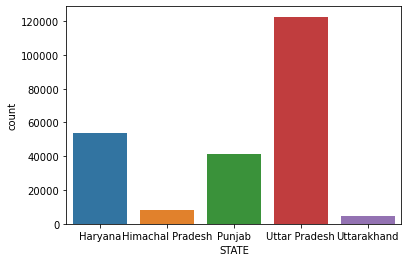

In [56]:
sns.countplot(x='STATE', data= df)

In [57]:
# ABC Company performance analysis

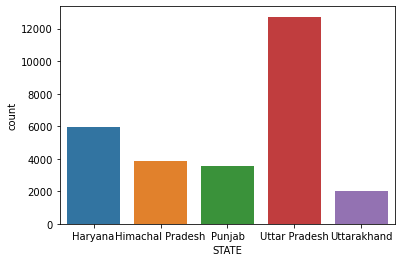

In [58]:
sns.countplot(x='STATE', data= merg_df)

In [59]:
merg_df['STATE'].value_counts(dropna= False)

Uttar Pradesh       12732
Haryana              5944
Himachal Pradesh     3840
Punjab               3584
Uttarakhand          1992
Name: STATE, dtype: int64

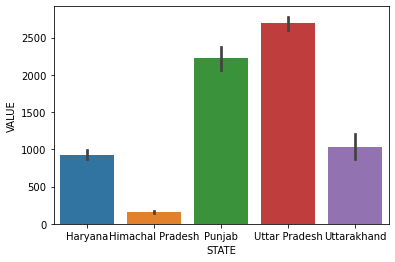

In [60]:
sns.barplot(x='STATE',y='VALUE',data= merg_df)

In [61]:
    # Uttar Pradesh's stands top in sales/consumption, 2nd is Punjab, 3rd Uttarakhand, 4th Haryana & bottom Himachal Pradesh is higher

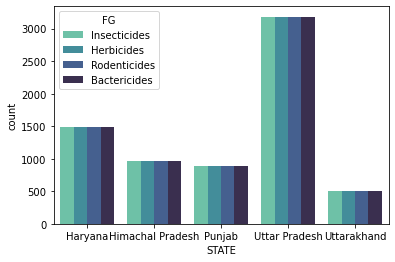

In [62]:
sns.countplot(x='STATE', hue='FG', data = merg_df, palette="mako_r")

In [63]:
# Pesticides are equally distributed in every state based on their consumption

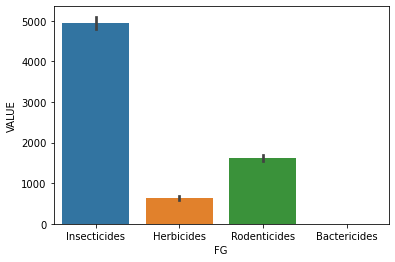

In [64]:
sns.barplot(x='FG',y='VALUE',data= merg_df)

In [65]:
# ABC Manufacturing company aren't supplying Bactericides whereas Insecticides tops the Sales

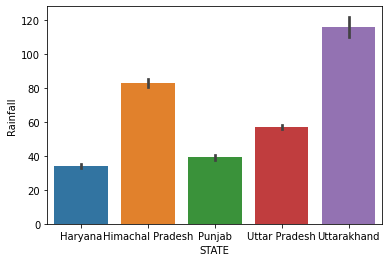

In [66]:
sns.barplot(x='STATE',y = 'Rainfall', data= merg_df)

In [67]:
# Uttarakhand & Himachal Pradesh has highest rainfall v/s low consumption. Where as Uttar Pradesh & Punjab has low rainfal with highest consumption

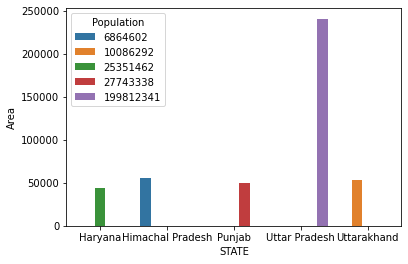

In [68]:
sns.barplot(x='STATE', y= 'Area', hue='Population',data= merg_df)

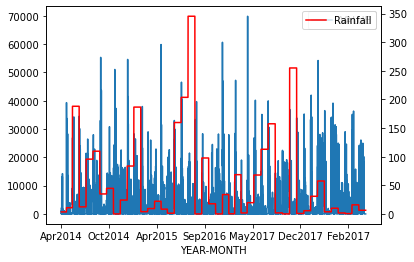

In [69]:
UP_df= merg_df[(merg_df['STATE']=='Uttar Pradesh')]
ax = UP_df.plot('YEAR-MONTH','VALUE')
ax1 = ax.twinx()
UP_df.plot('YEAR-MONTH','Rainfall',ax=ax1, color='r',kind = 'line')

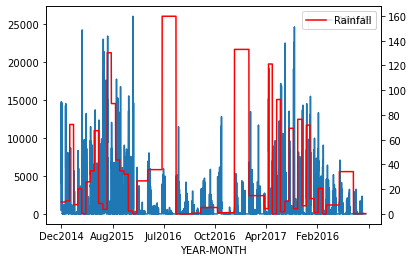

In [70]:
HR_df= merg_df[(merg_df['STATE']=='Haryana')]
ax = HR_df.plot('YEAR-MONTH','VALUE')
ax1 = ax.twinx()
HR_df.plot('YEAR-MONTH','Rainfall',ax=ax1, color='r',kind = 'line')

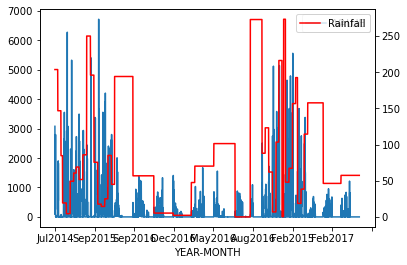

In [71]:
HP_df= merg_df[(merg_df['STATE']=='Himachal Pradesh')]
ax = HP_df.plot('YEAR-MONTH','VALUE')
ax1 = ax.twinx()
HP_df.plot('YEAR-MONTH','Rainfall',ax=ax1, color='r',kind = 'line')

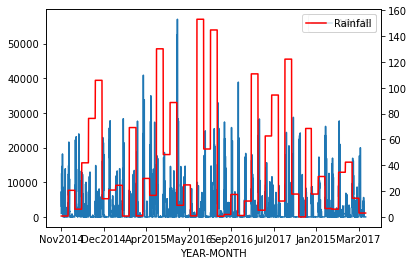

In [72]:
PJ_df= merg_df[(merg_df['STATE']=='Punjab')]
ax = PJ_df.plot('YEAR-MONTH','VALUE')
ax1 = ax.twinx()
PJ_df.plot('YEAR-MONTH','Rainfall',ax=ax1, color='r',kind = 'line')

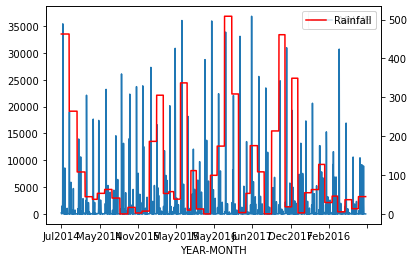

In [73]:
UK_df= merg_df[(merg_df['STATE']=='Uttarakhand')]
ax = UK_df.plot('YEAR-MONTH','VALUE')
ax1 = ax.twinx()
UK_df.plot('YEAR-MONTH','Rainfall',ax=ax1, color='r',kind = 'line')

In [74]:
# sns.pairplot(merg_df,hue='VALUE')

In [75]:
merg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28092 entries, 0 to 28091
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   FIN_YEAR                  28092 non-null  object        
 1   MONTH_x                   28092 non-null  object        
 2   STATE                     28092 non-null  object        
 3   FG                        28092 non-null  object        
 4   DISTRICT                  28092 non-null  object        
 5   COMPANY                   28092 non-null  object        
 6   VALUE                     28092 non-null  float64       
 7   Year-Month                28092 non-null  datetime64[ns]
 8   SUBDIVISION               28092 non-null  object        
 9   YEAR                      28092 non-null  int64         
 10  MONTH_y                   28092 non-null  object        
 11  Rainfall                  28092 non-null  float64       
 12  YEAR-MONTH        

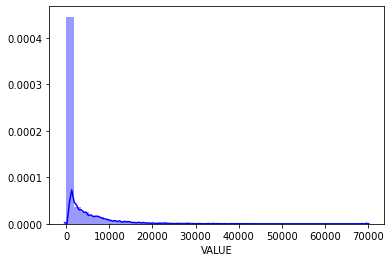

In [76]:
sns.distplot(merg_df['VALUE'],kde=True,color = 'blue',bins=40)

In [77]:
    # We observe that the VALUE which is the target variable is Right Skewed

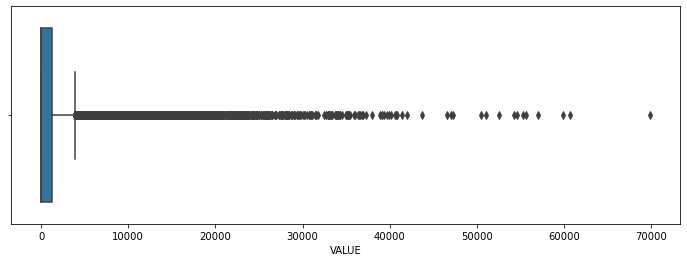

In [78]:
g = plt.subplots(figsize=(12, 4))
ax = sns.boxplot(x=merg_df['VALUE'],whis=2)

In [79]:
merg_df['Year-Month'].value_counts()

2016-10-01    988
2016-12-01    972
2016-09-01    968
2016-06-01    940
2016-11-01    920
2016-07-01    920
2017-03-01    904
2017-01-01    884
2017-02-01    876
2016-08-01    844
2016-05-01    840
2017-11-01    560
2016-04-01    560
2017-12-01    556
2014-10-01    552
2017-06-01    548
2014-11-01    548
2015-10-01    544
2015-07-01    544
2015-08-01    540
2014-12-01    540
2017-07-01    540
2015-12-01    540
2015-11-01    540
2014-06-01    540
2014-08-01    540
2015-02-01    536
2017-09-01    536
2015-01-01    536
2016-02-01    536
2017-05-01    536
2015-09-01    536
2016-01-01    532
2015-06-01    532
2016-03-01    532
2014-07-01    528
2017-10-01    528
2014-09-01    524
2017-08-01    524
2015-05-01    512
2015-04-01    512
2015-03-01    492
2014-05-01    488
2017-04-01    480
2014-04-01    444
Name: Year-Month, dtype: int64

In [80]:
merg_df.isnull().sum()

FIN_YEAR                    0
MONTH_x                     0
STATE                       0
FG                          0
DISTRICT                    0
COMPANY                     0
VALUE                       0
Year-Month                  0
SUBDIVISION                 0
YEAR                        0
MONTH_y                     0
Rainfall                    0
YEAR-MONTH                  0
Rank                        0
State or union territory    0
Population                  0
Area                        0
dtype: int64

In [81]:
merg_df.corr()

,VALUE,YEAR,Rainfall,Rank,Population,Area
VALUE,1.000000,-0.060921,-0.038300,-0.221409,0.196689,0.189013
YEAR,-0.060921,1.000000,0.007056,0.097241,-0.077340,-0.075006
Rainfall,-0.038300,0.007056,1.000000,0.123992,-0.025597,0.001392
Rank,-0.221409,0.097241,0.123992,1.000000,-0.863887,-0.812904
Population,0.196689,-0.077340,-0.025597,-0.863887,1.000000,0.994402
Area,0.189013,-0.075006,0.001392,-0.812904,0.994402,1.000000


In [82]:
# Rainfall has a low negative correlation with absolute value close to 0 with the Target variable. So, we can drop the rainfall data.

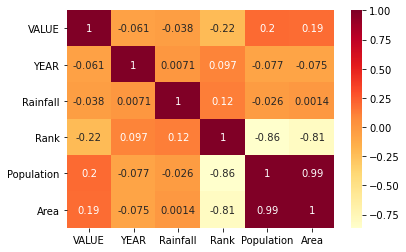

In [83]:
sns.heatmap(merg_df.corr(),annot= True,cmap="YlOrRd")

In [84]:
HR_rain =merg_df[merg_df['STATE'] == 'Haryana']

In [85]:
HR_rain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5944 entries, 0 to 5943
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   FIN_YEAR                  5944 non-null   object        
 1   MONTH_x                   5944 non-null   object        
 2   STATE                     5944 non-null   object        
 3   FG                        5944 non-null   object        
 4   DISTRICT                  5944 non-null   object        
 5   COMPANY                   5944 non-null   object        
 6   VALUE                     5944 non-null   float64       
 7   Year-Month                5944 non-null   datetime64[ns]
 8   SUBDIVISION               5944 non-null   object        
 9   YEAR                      5944 non-null   int64         
 10  MONTH_y                   5944 non-null   object        
 11  Rainfall                  5944 non-null   float64       
 12  YEAR-MONTH          

In [86]:
HR_rain.corr()

,VALUE,YEAR,Rainfall,Rank,Population,Area
VALUE,1.000000,-0.118551,-0.015975,NaN,NaN,NaN
YEAR,-0.118551,1.000000,-0.006553,NaN,NaN,NaN
Rainfall,-0.015975,-0.006553,1.000000,NaN,NaN,NaN
Rank,NaN,NaN,NaN,NaN,NaN,NaN
Population,NaN,NaN,NaN,NaN,NaN,NaN
Area,NaN,NaN,NaN,NaN,NaN,NaN


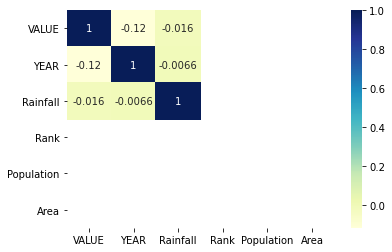

In [87]:
sns.heatmap(HR_rain.corr(),annot= True,cmap="YlGnBu")

In [88]:
UP_rain= merg_df[merg_df['STATE']==('Uttar Pradesh')]

PJ_rain= merg_df[merg_df['STATE']==('Punjab')]

UK_rain= merg_df[merg_df['STATE']==('Uttarakhand')]

HP_rain= merg_df[merg_df['STATE']==('Himachal Pradesh')]

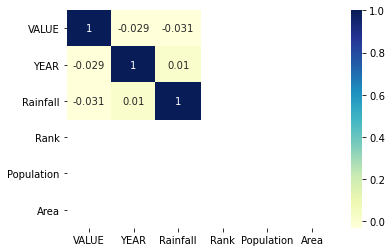

In [89]:
sns.heatmap(UP_rain.corr(), annot =True, cmap='YlGnBu')

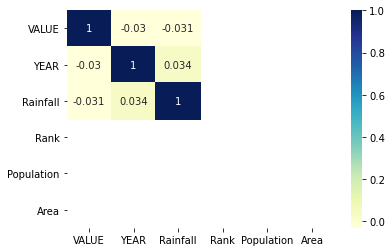

In [90]:
sns.heatmap(PJ_rain.corr(), annot =True, cmap='YlGnBu')

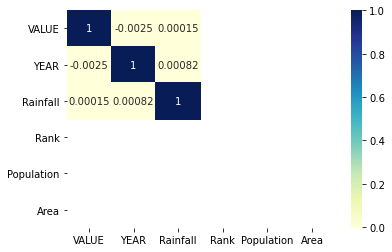

In [91]:
sns.heatmap(UK_rain.corr(), annot =True, cmap='YlGnBu')

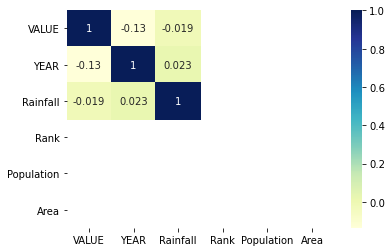

In [92]:
sns.heatmap(HP_rain.corr(), annot =True, cmap='YlGnBu')

In [93]:
new_df['Year-Month']= pd.to_datetime(new_df['Year-Month'],infer_datetime_format=True)

# Checking if the data is Stationary - using Augmneted Dickey Fuller Test

In [94]:
X= new_df.VALUE
result = adfuller(X)

In [95]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.136218
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [96]:
# The p-value is very less than the significance level of 0.05. Hence we can reject the null hypothesis and take that the series is stationary

In [97]:
new_df = new_df.sort_values('Year-Month')

In [98]:
new_df

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,Year-Month
119264,2014-2015,Apr,Uttar Pradesh,Rodenticides,Kanpur Dehat,ABC Manufacturing,25.650,2014-04-01
118547,2014-2015,Apr,Uttar Pradesh,Rodenticides,Gautam Buddha Nagar,ABC Manufacturing,0.000,2014-04-01
118546,2014-2015,Apr,Uttar Pradesh,Rodenticides,Ghaziabad,ABC Manufacturing,190.485,2014-04-01
118545,2014-2015,Apr,Uttar Pradesh,Rodenticides,Baghpat,ABC Manufacturing,82.080,2014-04-01
118544,2014-2015,Apr,Uttar Pradesh,Rodenticides,Meerut,ABC Manufacturing,85.995,2014-04-01
...,...,...,...,...,...,...,...,...
51514,2017-2018,Jan,Uttar Pradesh,Insecticides,Unnao,ABC Manufacturing,24476.850,2018-01-01
51515,2017-2018,Jan,Uttar Pradesh,Insecticides,Lucknow,ABC Manufacturing,8613.000,2018-01-01
51516,2017-2018,Jan,Uttar Pradesh,Insecticides,Rae Bareli,ABC Manufacturing,15958.890,2018-01-01
51510,2017-2018,Jan,Uttar Pradesh,Insecticides,Shahjahanpur,ABC Manufacturing,19044.450,2018-01-01


In [99]:
new_df.drop(['FIN_YEAR','MONTH','FG','DISTRICT','COMPANY'],axis=1,inplace =True)

In [100]:
new_df

,STATE,VALUE,Year-Month
119264,Uttar Pradesh,25.650,2014-04-01
118547,Uttar Pradesh,0.000,2014-04-01
118546,Uttar Pradesh,190.485,2014-04-01
118545,Uttar Pradesh,82.080,2014-04-01
118544,Uttar Pradesh,85.995,2014-04-01
...,...,...,...
51514,Uttar Pradesh,24476.850,2018-01-01
51515,Uttar Pradesh,8613.000,2018-01-01
51516,Uttar Pradesh,15958.890,2018-01-01
51510,Uttar Pradesh,19044.450,2018-01-01


# Segmentation based on States

In [101]:
HR=new_df[new_df['STATE'] == 'Haryana']

UP= new_df[new_df['STATE']==('Uttar Pradesh')]

PJ= new_df[new_df['STATE']==('Punjab')]

UK= new_df[new_df['STATE']==('Uttarakhand')]

HP= new_df[new_df['STATE']==('Himachal Pradesh')]

In [102]:
HR

,STATE,VALUE,Year-Month
175640,Haryana,0.00,2014-04-01
175641,Haryana,0.00,2014-04-01
175642,Haryana,0.00,2014-04-01
175643,Haryana,0.00,2014-04-01
175644,Haryana,0.00,2014-04-01
...,...,...,...
51895,Haryana,7995.24,2018-01-01
51894,Haryana,5064.93,2018-01-01
51893,Haryana,6092.82,2018-01-01
51892,Haryana,216.00,2018-01-01


In [103]:
UP

,STATE,VALUE,Year-Month
119264,Uttar Pradesh,25.650,2014-04-01
118547,Uttar Pradesh,0.000,2014-04-01
118546,Uttar Pradesh,190.485,2014-04-01
118545,Uttar Pradesh,82.080,2014-04-01
118544,Uttar Pradesh,85.995,2014-04-01
...,...,...,...
51513,Uttar Pradesh,15608.295,2018-01-01
51514,Uttar Pradesh,24476.850,2018-01-01
51515,Uttar Pradesh,8613.000,2018-01-01
51516,Uttar Pradesh,15958.890,2018-01-01


In [104]:
new_df=new_df.groupby('Year-Month')['VALUE'].sum().reset_index()

In [105]:
HR=HR.groupby('Year-Month')['VALUE'].sum().reset_index()

UP=UP.groupby('Year-Month')['VALUE'].sum().reset_index()

PJ=PJ.groupby('Year-Month')['VALUE'].sum().reset_index()

UK=UK.groupby('Year-Month')['VALUE'].sum().reset_index()

HP=HP.groupby('Year-Month')['VALUE'].sum().reset_index()

In [106]:
new_df=  new_df.set_index('Year-Month')

In [107]:
new_df

,VALUE
Year-Month,
2014-04-01,397456.335
2014-05-01,671365.935
2014-06-01,912168.945
2014-07-01,975706.155
2014-08-01,1403217.810
2014-09-01,1047744.315
2014-10-01,1235733.435
2014-11-01,1879893.765
2014-12-01,1439389.305


In [108]:
HR=  HR.set_index('Year-Month')

UP=  UP.set_index('Year-Month')

PJ=  PJ.set_index('Year-Month')

UK=  UK.set_index('Year-Month')

HP=  HP.set_index('Year-Month')

In [109]:
HR

,VALUE
Year-Month,
2014-04-01,32577.660
2014-05-01,47482.740
2014-06-01,130684.185
2014-07-01,75471.075
2014-08-01,107146.530
2014-09-01,138232.710
2014-10-01,168045.030
2014-11-01,175710.870
2014-12-01,127656.945


In [110]:
UP

,VALUE
Year-Month,
2014-04-01,142695.000
2014-05-01,395083.710
2014-06-01,553862.070
2014-07-01,720928.080
2014-08-01,1103308.965
2014-09-01,752904.720
2014-10-01,708021.540
2014-11-01,1431476.820
2014-12-01,1049625.270


# Resampling the data based on MS- Monthly Start

In [111]:
All= new_df['VALUE'].resample('MS').mean()

y= UP['VALUE'].resample('MS').mean()

y1= HR['VALUE'].resample('MS').mean()

y2= PJ['VALUE'].resample('MS').mean()

y3= UK['VALUE'].resample('MS').mean()

y4= HP['VALUE'].resample('MS').mean()

# Visualizing Pesticides Sales

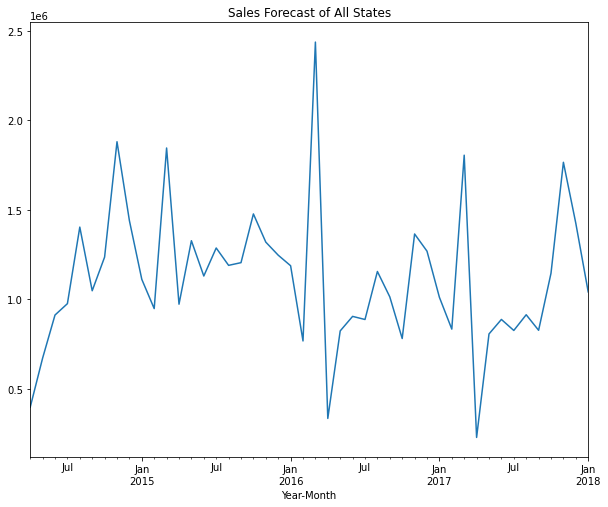

In [112]:
All.plot(figsize=(10,8))
plt.title('Sales Forecast of All States')
plt.show()

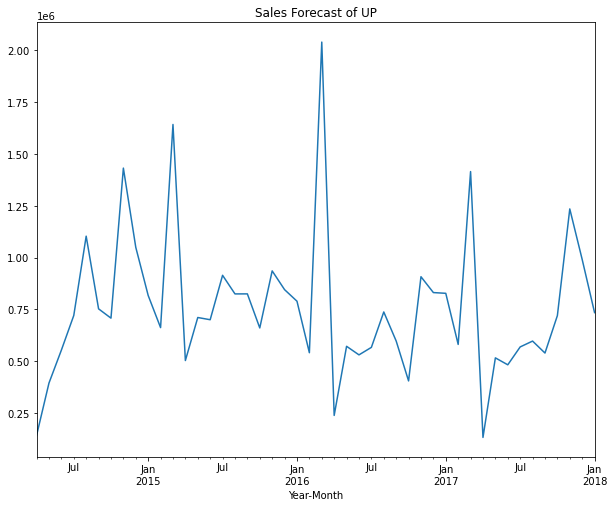

In [113]:
y.plot(figsize=(10,8))
plt.title('Sales Forecast of UP')
plt.show()

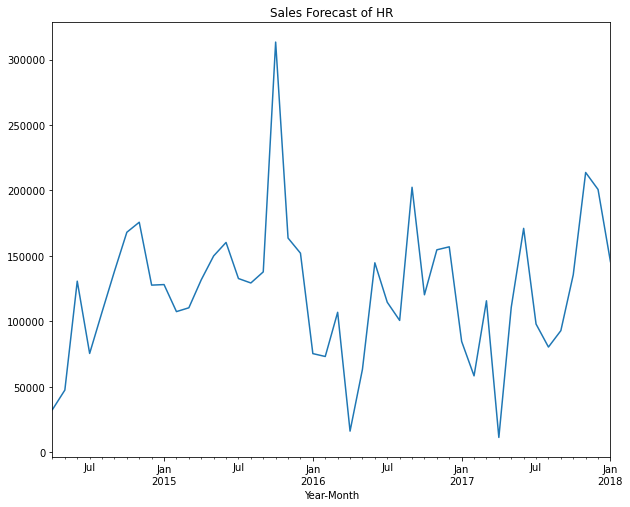

In [114]:
y1.plot(figsize=(10,8))
plt.title('Sales Forecast of HR')
plt.show()

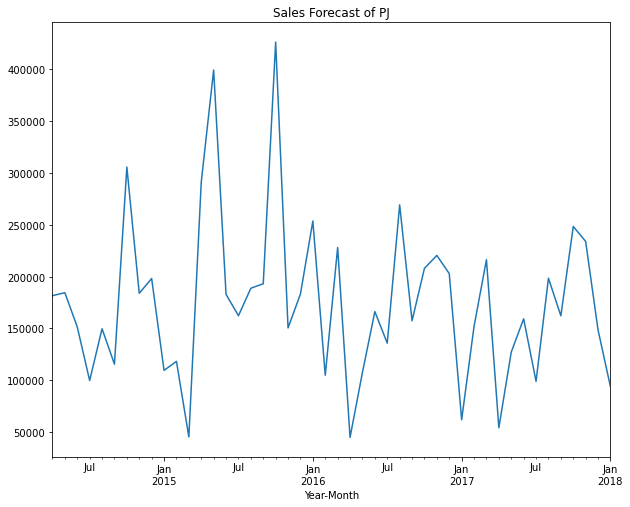

In [115]:
y2.plot(figsize=(10,8))
plt.title('Sales Forecast of PJ')
plt.show()

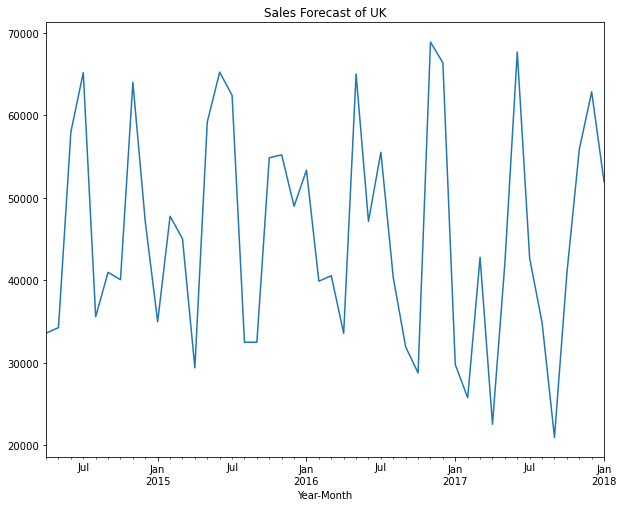

In [116]:
y3.plot(figsize=(10,8))
plt.title('Sales Forecast of UK')
plt.show()

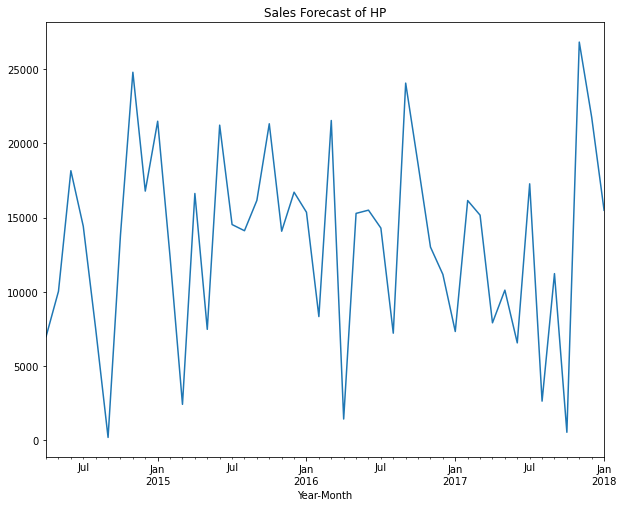

In [117]:
y4.plot(figsize=(10,8))
plt.title('Sales Forecast of HP')
plt.show()

# Appears that there are distinguishable patterns when we plot the data. The time-series has seasonality pattern.

# Checking our data with a method called Decompostion. It allows us to decompose the time series data into three distinct components trend, seasonality and noise

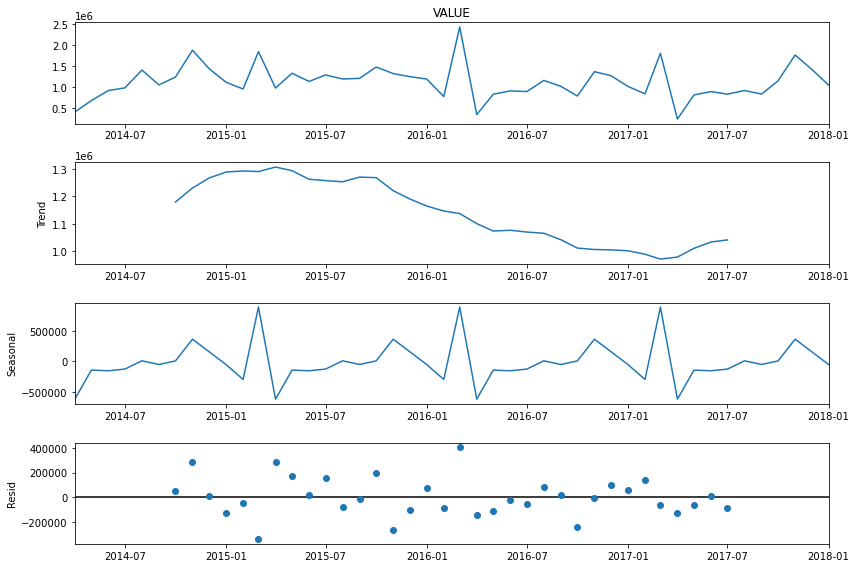

In [118]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] =12,8
decomposition = sm.tsa.seasonal_decompose(All,model= 'additive')
fig= decomposition.plot()
plt.show()

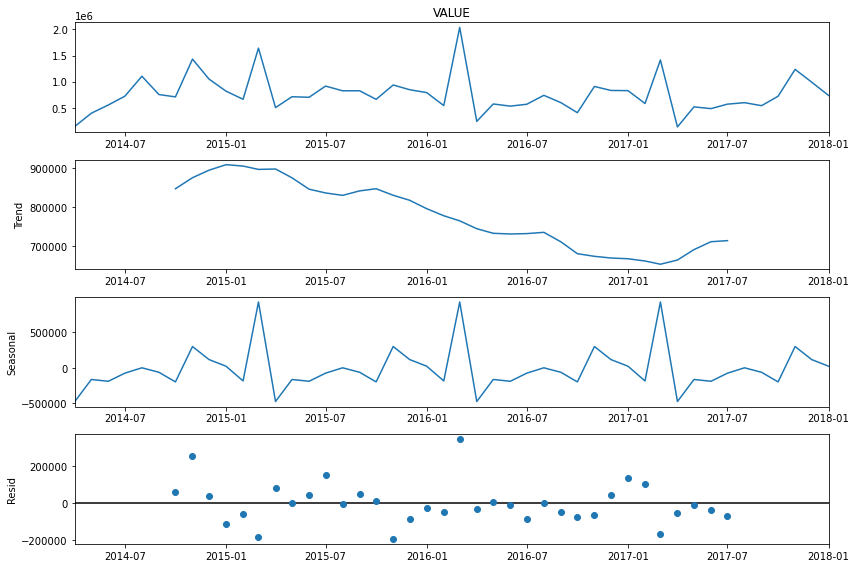

In [119]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] =12,8
decomposition = sm.tsa.seasonal_decompose(y,model= 'additive')
fig= decomposition.plot()
plt.show()

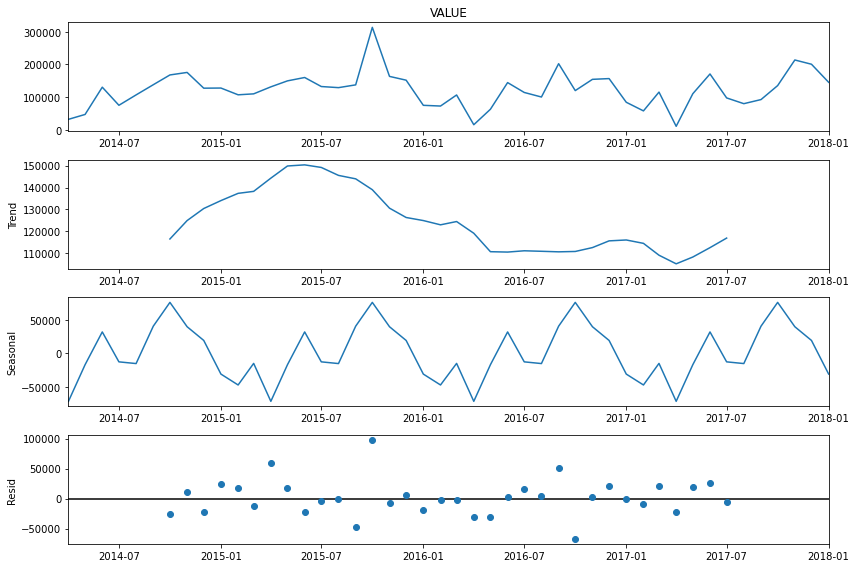

In [120]:
rcParams['figure.figsize'] =12,8
decomposition = sm.tsa.seasonal_decompose(y1,model= 'additive')
fig= decomposition.plot()
plt.show()

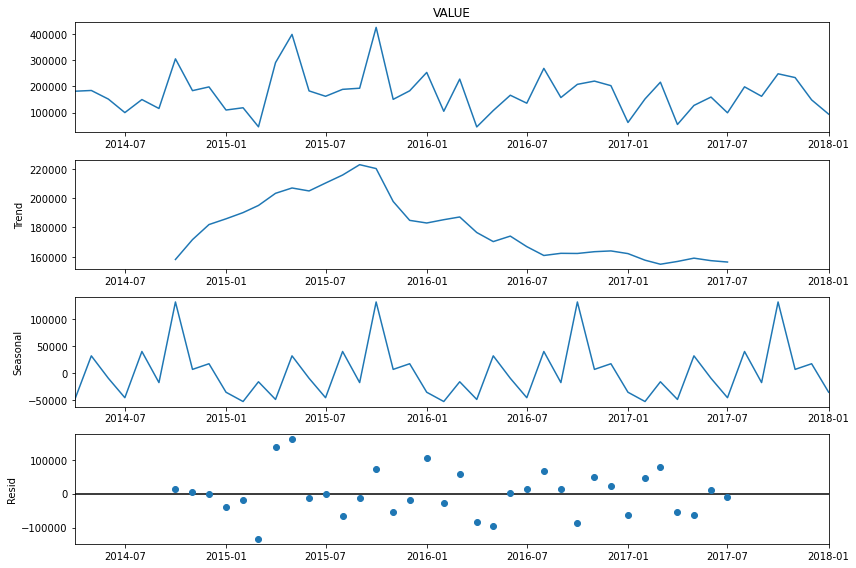

In [121]:
rcParams['figure.figsize'] =12,8
decomposition = sm.tsa.seasonal_decompose(y2,model= 'additive')
fig= decomposition.plot()
plt.show()

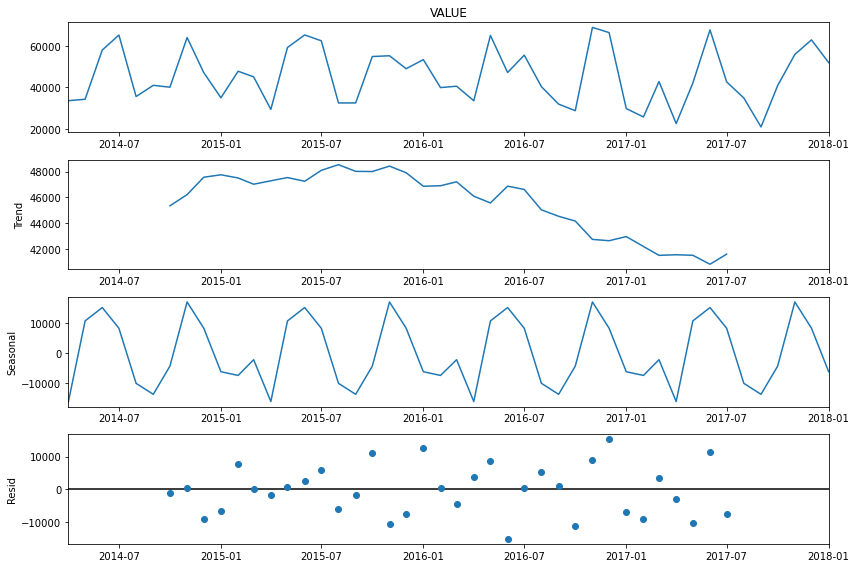

In [122]:
rcParams['figure.figsize'] =12,8
decomposition = sm.tsa.seasonal_decompose(y3,model= 'additive')
fig= decomposition.plot()
plt.show()

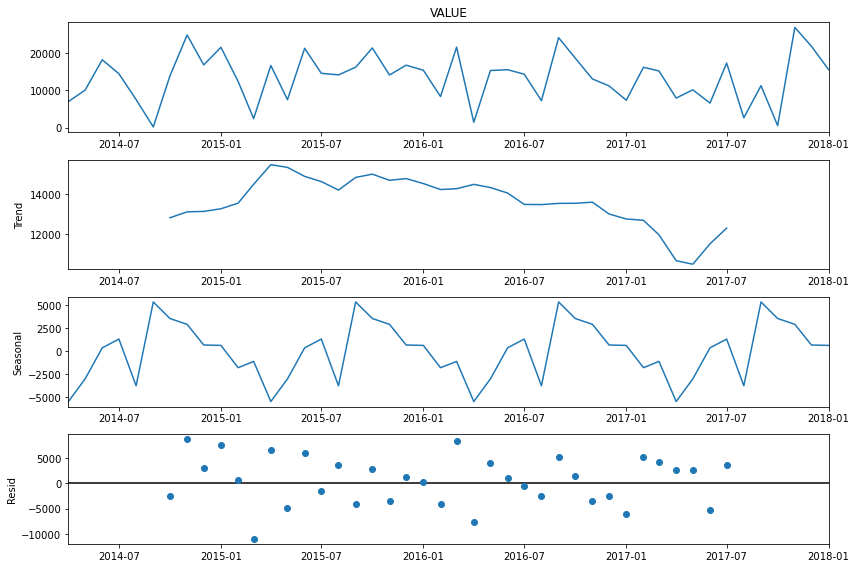

In [123]:
rcParams['figure.figsize'] =12,8
decomposition = sm.tsa.seasonal_decompose(y4,model= 'additive')
fig= decomposition.plot()
plt.show()

In [124]:
    # The plots above clearly shows that the sales are uncertain, along with its seasonality

# Split the Train and Test Data based on States

In [125]:
train_len = 38
train_All = All[0:train_len]
test_All = All[train_len:]

In [126]:
train_len = 38
train = y[0:train_len]
test = y[train_len:]

In [127]:
train_len1 = 38
train1 = y1[0:train_len1]
test1 = y1[train_len1:]

In [128]:
train_len2 = 38
train2 = y2[0:train_len2]
test2 = y2[train_len2:]

In [129]:
train_len3 = 38
train3 = y3[0:train_len3]
test3 = y3[train_len3:]

In [130]:
train_len4 = 38
train4 = y4[0:train_len4]
test4 = y4[train_len4:]

In [131]:
train_All

Year-Month
2014-04-01     397456.335
2014-05-01     671365.935
2014-06-01     912168.945
2014-07-01     975706.155
2014-08-01    1403217.810
2014-09-01    1047744.315
2014-10-01    1235733.435
2014-11-01    1879893.765
2014-12-01    1439389.305
2015-01-01    1111483.620
2015-02-01     948193.695
2015-03-01    1844857.215
2015-04-01     972697.815
2015-05-01    1327196.610
2015-06-01    1130045.175
2015-07-01    1286570.115
2015-08-01    1189612.710
2015-09-01    1204622.280
2015-10-01    1476752.310
2015-11-01    1319289.390
2015-12-01    1246455.270
2016-01-01    1187494.830
2016-02-01     767470.140
2016-03-01    2436214.185
2016-04-01     334879.245
2016-05-01     823509.045
2016-06-01     904649.985
2016-07-01     887279.400
2016-08-01    1155364.020
2016-09-01    1013587.560
2016-10-01     781062.480
2016-11-01    1364768.730
2016-12-01    1268752.302
2017-01-01    1011294.180
2017-02-01     833588.280
2017-03-01    1804697.928
2017-04-01     228778.560
2017-05-01     806600.835
F

In [132]:
train

Year-Month
2014-04-01     142695.000
2014-05-01     395083.710
2014-06-01     553862.070
2014-07-01     720928.080
2014-08-01    1103308.965
2014-09-01     752904.720
2014-10-01     708021.540
2014-11-01    1431476.820
2014-12-01    1049625.270
2015-01-01     817419.600
2015-02-01     662409.630
2015-03-01    1641843.540
2015-04-01     503665.560
2015-05-01     711111.285
2015-06-01     700414.290
2015-07-01     914662.530
2015-08-01     824892.660
2015-09-01     825032.385
2015-10-01     660813.660
2015-11-01     935888.850
2015-12-01     845433.045
2016-01-01     789729.885
2016-02-01     541337.310
2016-03-01    2039066.595
2016-04-01     239000.760
2016-05-01     572291.325
2016-06-01     531000.900
2016-07-01     567115.020
2016-08-01     737854.650
2016-09-01     597814.560
2016-10-01     405397.035
2016-11-01     907754.040
2016-12-01     831337.992
2017-01-01     827758.980
2017-02-01     581322.015
2017-03-01    1414752.183
2017-04-01     132897.240
2017-05-01     516515.670
F

In [133]:
test_All

Year-Month
2017-06-01     887608.935
2017-07-01     826062.030
2017-08-01     913790.700
2017-09-01     827022.555
2017-10-01    1145671.290
2017-11-01    1765050.480
2017-12-01    1424822.265
2018-01-01    1041386.625
Freq: MS, Name: VALUE, dtype: float64

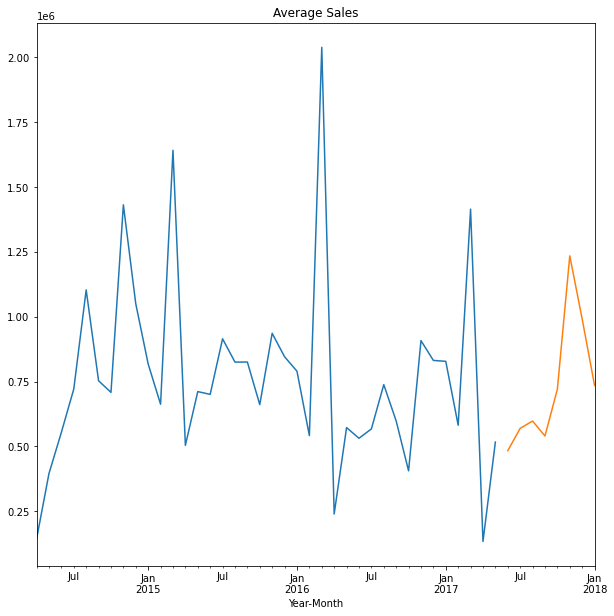

In [134]:
train.plot(figsize=(10,10), title='Average Sales')
test.plot(figsize=(10,10), title='Average Sales')

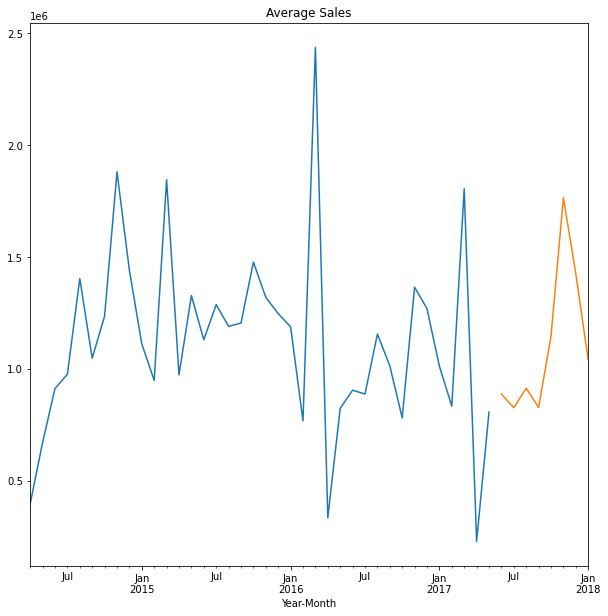

In [135]:
train_All.plot(figsize=(10,10), title='Average Sales')
test_All.plot(figsize=(10,10), title='Average Sales')

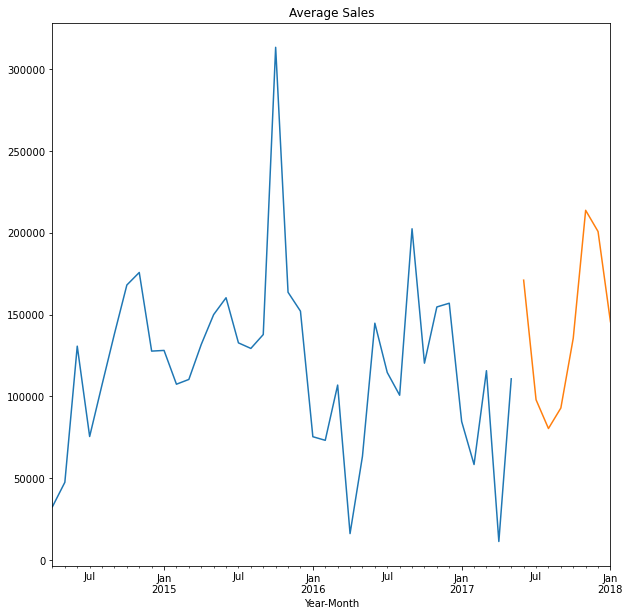

In [136]:
train1.plot(figsize=(10,10), title='Average Sales')
test1.plot(figsize=(10,10), title='Average Sales')

# MODEL BUILDING

# Holt Winters' additive method with trend and seasonality

In [137]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
y_hat_hwa = y.copy()

In [138]:
model = ExponentialSmoothing(np.asarray(y) ,seasonal_periods=12 ,trend='add', seasonal='add')

In [139]:
model_fit = model.fit(optimized=True)
print(model_fit.params)

{'smoothing_level': 0.3040638918158412, 'smoothing_slope': 2.4054638319759194e-15, 'smoothing_seasonal': 1.5063106616921598e-07, 'damping_slope': nan, 'initial_level': 171998.59105019987, 'initial_slope': 1466.0453841462845, 'initial_seasons': array([  70304.57952625,  314519.4093907 ,  330933.85984238,
        466363.45337435,  611471.15432354,  474612.76824263,
        390184.06592434,  908002.58918307,  708060.47392134,
        586582.2781648 ,  376208.5736046 , 1490097.28428563]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [140]:
y_hat_pred = model_fit.forecast(46)

In [141]:
prediction_values=pd.DataFrame(y_hat_pred)

In [142]:
prediction_values.to_excel("C:\Deepak\Imarticus\Capstone Project\predictions_holds_model.xlsx")

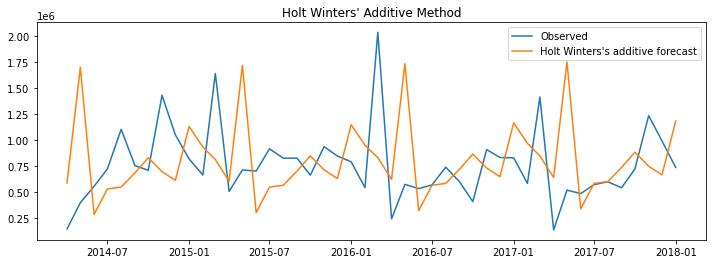

In [143]:
plt.figure(figsize=(12,4))
plt.plot(y.index,y, label='Observed')
plt.plot(y_hat_hwa.index,y_hat_pred, label='Holt Winters\'s additive forecast')
plt.title('Holt Winters\' Additive Method')
plt.legend(loc='best')
plt.show()

In [144]:
rmse = np.sqrt(mean_squared_error(y_hat_hwa, y_hat_pred)).round(2)

In [145]:
print(rmse)

512811.74


In [146]:
mape = np.round(np.mean(np.abs(y_hat_hwa-y_hat_pred)/y_hat_hwa)*100,2)

In [147]:
print(mape)

68.97


In [148]:
from statsmodels.tsa.arima_model import ARIMA

In [149]:
y.shape

(46,)

In [230]:
model = ARIMA(y, order=(0,1,1))

In [231]:
m1 = model.fit()

In [232]:
print(m1.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.VALUE   No. Observations:                   45
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -641.311
Method:                       css-mle   S.D. of innovations         358572.471
Date:                Fri, 03 Sep 2021   AIC                           1288.623
Time:                        16:55:27   BIC                           1294.043
Sample:                    05-01-2014   HQIC                          1290.643
                         - 01-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1431.6675   3982.295     -0.360      0.719   -9236.822    6373.487
ma.L1.D.VALUE    -1.0000      0.070    -14.185      0.000      -1.138      -0.862
                                    Root

In [265]:
y_hat= y.copy()
y_pred_AR = m1.predict()

In [270]:
y_hat[1:].shape

(45,)

In [253]:
y_pred_AR.shape

(45,)

In [255]:
y_pred_AR

Year-Month
2014-05-01   -1.431667e+03
2014-06-01   -1.283419e+05
2014-07-01   -1.928451e+05
2014-08-01   -2.713650e+05
2014-09-01   -5.244284e+05
2014-10-01   -1.464518e+05
2014-11-01   -8.849048e+04
2014-12-01   -7.118842e+05
2015-01-01   -2.947940e+05
2015-02-01   -5.776119e+04
2015-03-01    8.697631e+04
2015-04-01   -8.195178e+05
2015-05-01    2.927162e+05
2015-06-01    7.774805e+04
2015-07-01    8.111704e+04
2015-08-01   -1.262422e+05
2015-09-01   -3.575853e+04
2015-10-01   -3.533558e+04
2015-11-01    1.206682e+05
2015-12-01   -1.481184e+05
2016-01-01   -5.634838e+04
2016-02-01   -2.047557e+03
2016-03-01    2.342027e+05
2016-04-01   -1.212311e+06
2016-05-01    5.628127e+05
2016-06-01    2.192627e+05
2016-07-01    2.494713e+05
2016-08-01    2.043056e+05
2016-09-01    3.097688e+04
2016-10-01    1.638847e+05
2016-11-01    3.433770e+05
2016-12-01   -1.554436e+05
2017-01-01   -7.806442e+04
2017-02-01   -7.372633e+04
2017-03-01    1.663444e+05
2017-04-01   -6.499873e+05
2017-05-01    6.1

In [256]:
print(y_hat)

(45,)


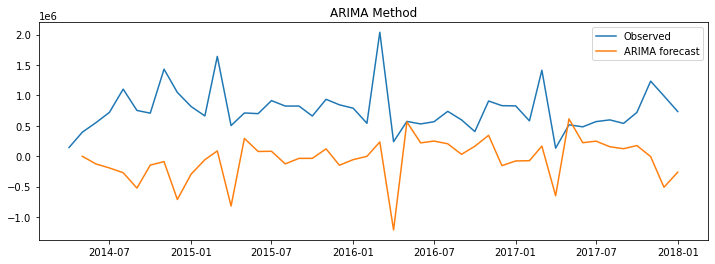

In [257]:
plt.figure(figsize=(12,4))
plt.plot(y, label='Observed')
plt.plot(y_pred_AR, label='ARIMA forecast')
plt.legend(loc='best')
plt.title('ARIMA Method')
plt.show()

In [272]:
rmse = np.sqrt(mean_squared_error(y_hat[1:], y_pred_AR)).round(2)

In [273]:
print(rmse)

938937.45


In [274]:
mape = np.round(np.mean(np.abs(y_hat[1:]-y_pred_AR)/y_hat[1:])*100,2)

In [275]:
print(mape)

121.78


# ARIMA didn't work as there is a seasonality involved. We will try with SARIMA

# Time series forecasting with SARIMA

In [161]:
import itertools

In [162]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [163]:
# Using a “grid search” to find the optimal set of parameters that yields the best performance for our model

In [164]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(All,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1389.6135072882755
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:18921482.36994956
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:936.3408310520174
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:583.6366910090258
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:965.3097974063636
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:17974796.764630936
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:614.9040733527651
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:585.3123387045262
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1341.857149166902
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:18470719.418752912
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:905.4943052125689
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:555.7689126941134
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1023.7001047384913
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:17524494.689228583
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:618.3269615499362
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:557.4751732650053
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1297.5214122091315
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2717161.8665727973
ARI

C:\Python\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2652352.9376323945
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:885.2609151432152
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:533.4674804390263
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:939.3062547949658


C:\Python\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1975433.5513225081
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:588.8232997650018
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:535.2070571077043
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1325.5923559354085
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:2737119.296153578
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:935.605240074777
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:584.0060899860273
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:952.0360022830371
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:2006415.9864938841
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:585.0501450968252
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:585.6404471300051
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1276.2859039547934
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2648713.6133516813
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:906.4291009416909
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:557.5023640348521
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:941.5526362062232
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1939305.1009471687
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:586.4237383161659
ARIMA

C:\Python\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1861468.1047368436
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:563.0320146386671
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:536.9846925120162


In [165]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1358.3563883309002
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:10478172.095364133
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:911.6109265342633
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:568.25560537259
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:937.059825673362
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:914.3627206347429
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:602.7008852639436
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:569.8509782590293
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1315.3176451717113
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:10322025.44121604
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:882.4554967116904
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:541.0305563893872
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:999.7638705322505
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:943.2506732561679
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:604.0065194093434
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:542.6966421616173
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1287.3671105922695
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3328774.124086339


C:\Python\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:898.9065711319201
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:546.3705775354448
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:922.3678376209435
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:2033264.7728092466
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:565.781626172736
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:548.0886707183955
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1236.4049362013598
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:3269932.249143218


C:\Python\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:863.2557490831683
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:516.9073570413998
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:922.9830592492729
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2016365.9317643028
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:574.0952828390514
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:518.3799841329301
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1313.4856062817112
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:3149533.050164698
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:909.667067299446
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:567.3271452136507
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:938.86694854318
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:940.8299571242184
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:570.3774592977416
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:568.8953229329334
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1266.105489186271
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1702610534.0626984
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:883.8325611122867
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:542.4130311552905
ARIMA(1, 0

C:\Python\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2117584.33518099
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:864.9808207432353
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:518.9076964466171
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:900.1337195010603


C:\Python\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1833148.3787866174
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:549.1131052401411
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:520.4080996871154


In [166]:
# The above output suggests that ARIMA(0, 1, 1)x(0, 1, 1, 12) yields the lowest AIC value. Therefore we should consider this to be optimal option.

In [167]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod1 = sm.tsa.statespace.SARIMAX(y1,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results1 = mod1.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results1.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1193.3588114279141
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:191398.9742929355
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:826.009484973081
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:518.1633664498069
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:852.1267289385912
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:173893.29935937613
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:542.2523817076109
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:519.6055616655792
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1144.842751765099
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:189083.52367081447
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:799.9593560681546


C:\Python\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:495.5322740736133
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:878.3757673013909


C:\Python\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:147893.68433658825
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:546.1022547647655
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:497.1497652970307
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1096.8348423230527
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:18811.50327661639
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:820.3955913634497
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:503.8344158536265
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:830.2075270169224
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:18230.945958722274
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:529.5375349412157
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:505.75875870083354
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1064.4143247713237


C:\Python\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:780.1380942975088
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:472.5684745231294
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:820.4646961493945
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:11248.281564098634
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:525.2069798226785
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:475.1501657562525
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1120.9188675937703
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:19200.342422957543
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:825.8885687295932
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:519.7822239893187
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:826.0668152093076
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:18653.430927756042
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:521.0186232343042
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:521.2016949354907
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1092.6809425323781


C:\Python\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:15305.0950756031
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:800.7378541255587


C:\Python\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:496.3563202321496
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:821.7003702971991


C:\Python\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:521.9799695994129
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:498.2917185675015
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1093.8920105576774
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:18111.988739667562
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:808.8326229863949
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:501.27394480151963
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:801.9463974517688
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:17508.382006298263
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:503.528557821698
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:503.1653538210314
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1064.5360257674752
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:12318.983554936518
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:781.6989153646749
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:475.03908851329413
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:796.3248847665336
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:10913.467865339717
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:502.14825735836314
ARIMA(1, 1, 1)x(

In [168]:
# The above output suggests that ARIMA(0, 1, 1)x(0, 1, 1, 12) yields the lowest AIC value. Therefore we should consider this to be optimal option.

In [169]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod2 = sm.tsa.statespace.SARIMAX(y2,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results2 = mod2.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results2.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1224.9091840487254
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:385173.79690492386
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:862.565800319478
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:537.6306663760582
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:886.4542626893609
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1039.7812573409763
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:568.1649781183652
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:539.618526861926
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1179.0798857027498
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:351073.32173991523
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:833.7059685288386


C:\Python\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:511.04194259959183
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:905.097954915501
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:852.7738641489634
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:571.1895857890819
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:511.6426688621058
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1149.0040988659648
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:135262.7345630139
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:856.2258620575241
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:523.6400241785558
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:863.097135983373
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:74671.69629357441
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:550.1975910799484
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:525.464105419527
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1100.3224851667685


C:\Python\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:131578.04650563875
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:813.6833054345038
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:492.9660690182737
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:847.0048849446283
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:73604.6109030055
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:548.3843575603358
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:494.7959168638035
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1171.9292809489382
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:130590.49585178599
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:862.4597023611606
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:539.7314571207453
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:859.8820279574328
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:861.849312346959
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:542.4895097247912
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:541.7177758696841
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1124.6503200402149
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:129805.78513827203
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:858.7528761785104
ARIMA(1

C:\Python\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:850.0099732534325
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:523.1250758995072
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:829.7815873124641
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:54457.82418978863
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:527.1709288201674
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:524.9375125877215
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1100.4811323810216
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:92602.40057953613
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:815.6502659683986
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:494.6264735938929
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:818.5988317826982
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:231204.60682943868
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:520.6575796006582
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:496.4573391643566


In [170]:
# The above output suggests that ARIMA(0, 1, 1)x(0, 1, 1, 12) yields the lowest AIC value. Therefore we should consider this to be optimal option.

In [171]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod3 = sm.tsa.statespace.SARIMAX(y3,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results3 = mod3.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results3.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1099.4023132587022
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:809.3561733810709
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:723.9575093319811
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:460.6492085600159
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:745.6156988797468


C:\Python\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:943.0454654954086
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:479.18507861180325
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:460.3107309582286
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1049.4513570222607


C:\Python\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:22207.792282664588
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:699.350643924701
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:437.83929808238156
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:801.0685394825617


C:\Python\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:23752.493680545267
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:481.59863311992933
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:437.19964323553666
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:987.1744249735362


C:\Python\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:797.3992913511149
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:727.9323602993355
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:453.04245012643895
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:740.673664145216
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:5423.026659134899
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:473.83213403216917
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:452.8406635440047
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:950.8830230928395
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:5229.777802860794
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:687.0301414190023
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:424.8519578263744
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:726.058428973505
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:5443.636874803945
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:469.1200904235508
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:425.29206862917437
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1009.3068052482938
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:5658.429606538765
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:724.4309290334182
ARIMA(1,

In [172]:
# The above output suggests that ARIMA(0, 1, 1)x(0, 1, 1, 12) yields the lowest AIC value. Therefore we should consider this to be optimal option.

In [173]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod4 = sm.tsa.statespace.SARIMAX(y4,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results4 = mod4.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results4.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:995.1335202589979
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:895.1935784208057


C:\Python\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:695.6163104652268
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:439.59034339813957
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:715.8885794516351


C:\Python\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1117.7825581800673
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:463.8903888166886
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:441.3134877241686
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:959.2242892417459
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:5484.744397424639
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:677.0769959832423
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:421.2138486391491
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:732.6407364360651
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:12399.63257568745
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:465.83035207592485
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:422.88928019792456
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:933.6179208291911


C:\Python\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1317.753759506109
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:700.8659755566616
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:431.32278367006097
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:703.1841679243419
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:3181.9527481085574
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:457.48340089235325
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:432.17465030840657
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:888.8648263052615
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:3235.252384633436
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:662.2807534334825
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:404.2240315726891
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:681.554872829659
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2994.556727515733
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:448.35005391772
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:405.99701820208287
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:951.4799312799474
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:3732.185725732322
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:697.0551374463653

C:\Python\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "



ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:441.5855163168268
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:696.5120164723565


C:\Python\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1115.0159922727407
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:443.9003927073844
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:443.30705719286993
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:912.6812721417253
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1826757.8681845441
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:678.9556102683803
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:423.1962405165817
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:683.9386049617071
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:3285.140086430416
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:445.94988279918635
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:424.87005972190195
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:921.0256389194894
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:3366.5468294477687
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:689.8872742143781
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:426.7110981862975
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:668.1914025797137


C:\Python\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1163.0568352665255
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:430.8839027575199
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:428.3475882465412
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:890.7082747339906
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:181308.68087984296
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:663.7466693068179
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:405.89166300739146
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:662.7217458565331
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:3424.2750772396325
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:429.5098207643484
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:407.7217574564071


In [174]:
# The above output suggests that ARIMA(0, 1, 1)x(0, 1, 1, 12) yields the lowest AIC value. Therefore we should consider this to be optimal option.

# Fitting the SARIMA model

In [175]:
mod = sm.tsa.statespace.SARIMAX(All,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_All = mod.fit()
print(results_All.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              VALUE   No. Observations:                   46
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -263.734
Date:                            Fri, 03 Sep 2021   AIC                            533.467
Time:                                    16:52:27   BIC                            536.301
Sample:                                04-01-2014   HQIC                           533.947
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5730      0.551     -1.040      0.298      -1.653       0.507
ma.S.L12      -0.4242      0.262   

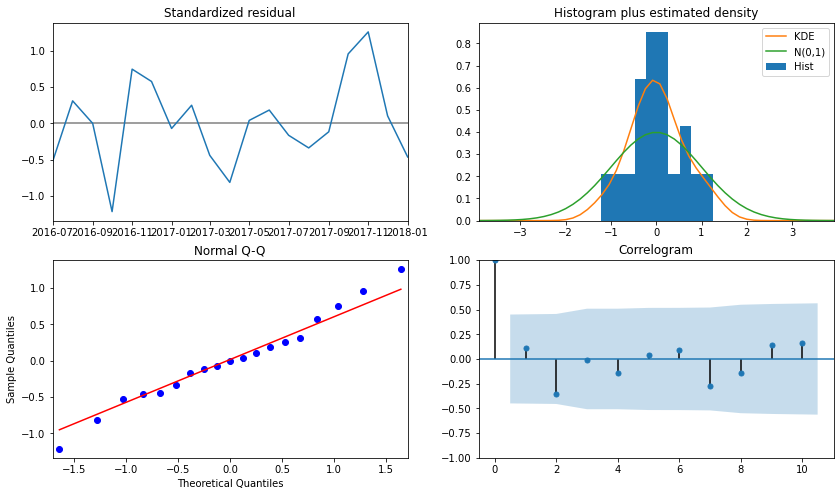

In [176]:
results_All.plot_diagnostics(figsize=(14, 8))
plt.show()

In [177]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              VALUE   No. Observations:                   46
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -255.454
Date:                            Fri, 03 Sep 2021   AIC                            516.907
Time:                                    16:52:28   BIC                            519.741
Sample:                                04-01-2014   HQIC                           517.387
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4309      0.489      0.881      0.378      -0.528       1.390
ma.S.L12      -0.4671      0.201   

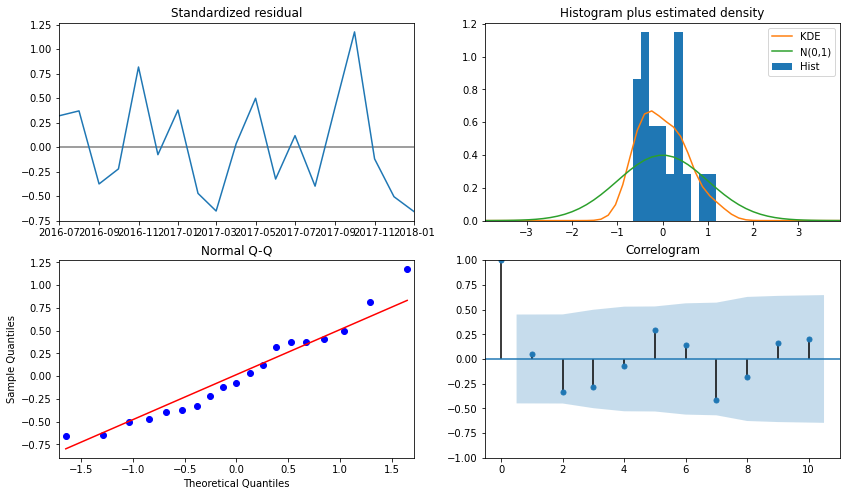

In [178]:
results.plot_diagnostics(figsize=(14, 8))
plt.show()

In [179]:
# The Normal Q-Q plot shows that the ordered distribution of residuals follows the distribution similar to normal distribution.

In [180]:
mod1 = sm.tsa.statespace.SARIMAX(y1,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results1 = mod1.fit()
print(results1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              VALUE   No. Observations:                   46
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -233.284
Date:                            Fri, 03 Sep 2021   AIC                            472.568
Time:                                    16:52:29   BIC                            475.402
Sample:                                04-01-2014   HQIC                           473.048
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0161      0.023    -44.649      0.000      -1.061      -0.971
ma.S.L12      -0.6643      0.285   

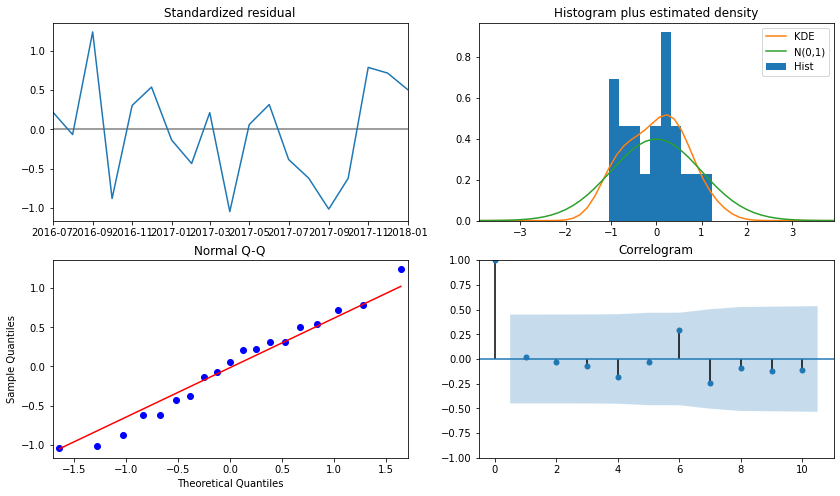

In [181]:
results1.plot_diagnostics(figsize=(14, 8))
plt.show()

In [182]:
mod2 = sm.tsa.statespace.SARIMAX(y2,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results2 = mod2.fit()
print(results2.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              VALUE   No. Observations:                   46
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -243.483
Date:                            Fri, 03 Sep 2021   AIC                            492.966
Time:                                    16:52:30   BIC                            495.799
Sample:                                04-01-2014   HQIC                           493.446
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8093      0.274     -2.949      0.003      -1.347      -0.271
ma.S.L12      -0.4654      0.363   

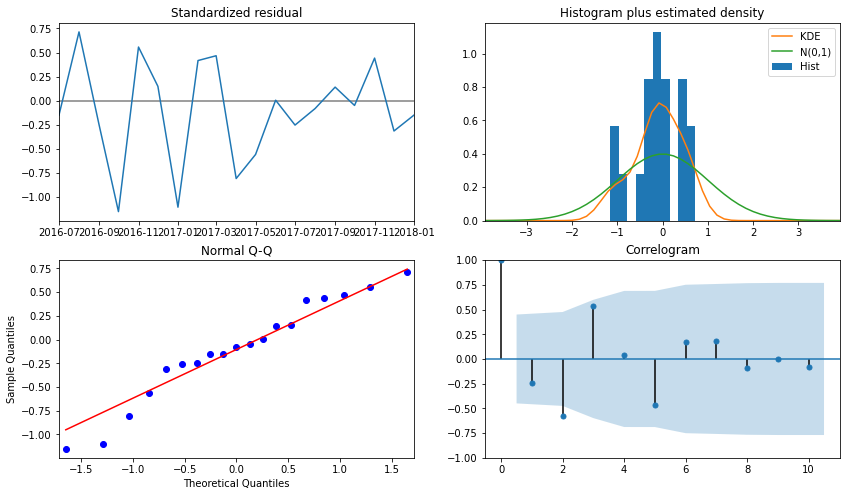

In [183]:
results2.plot_diagnostics(figsize=(14, 8))
plt.show()

In [184]:
mod3 = sm.tsa.statespace.SARIMAX(y3,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results3 = mod3.fit()
print(results3.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              VALUE   No. Observations:                   46
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -209.426
Date:                            Fri, 03 Sep 2021   AIC                            424.852
Time:                                    16:52:31   BIC                            427.685
Sample:                                04-01-2014   HQIC                           425.331
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.1875      0.178     -6.688      0.000      -1.535      -0.839
ma.S.L12      -0.3065      0.342   

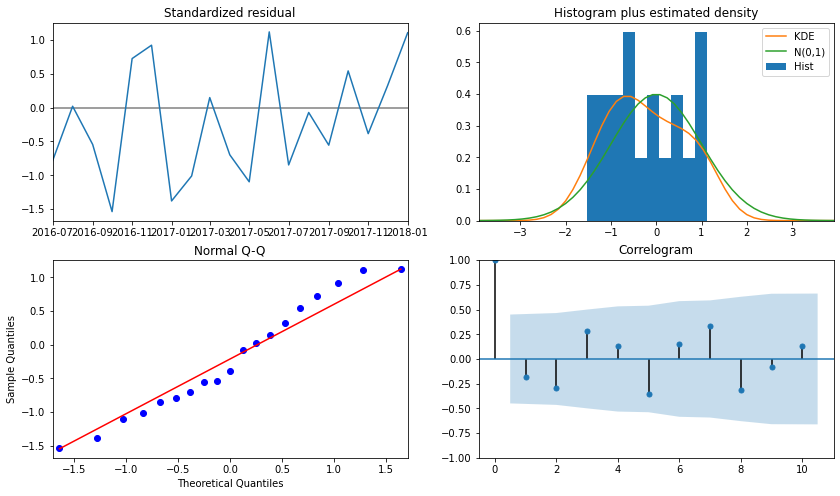

In [185]:
results3.plot_diagnostics(figsize=(14, 8))
plt.show()

In [186]:
mod4 = sm.tsa.statespace.SARIMAX(y4,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results4 = mod4.fit()
print(results4.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              VALUE   No. Observations:                   46
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -199.112
Date:                            Fri, 03 Sep 2021   AIC                            404.224
Time:                                    16:52:32   BIC                            407.057
Sample:                                04-01-2014   HQIC                           404.704
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7998      0.261     -3.062      0.002      -1.312      -0.288
ma.S.L12      -0.9192      0.418   

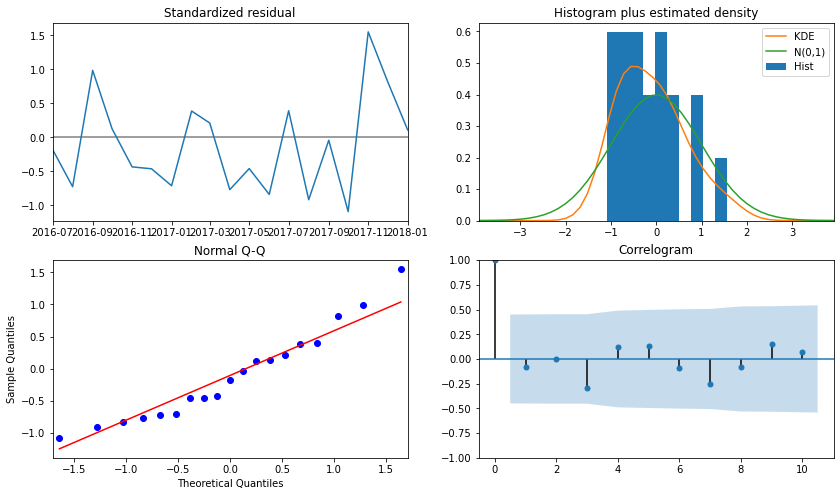

In [187]:
results4.plot_diagnostics(figsize=(14, 8))
plt.show()

# Validating forecasts

# To check the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2017–01–01 to the end of the data.

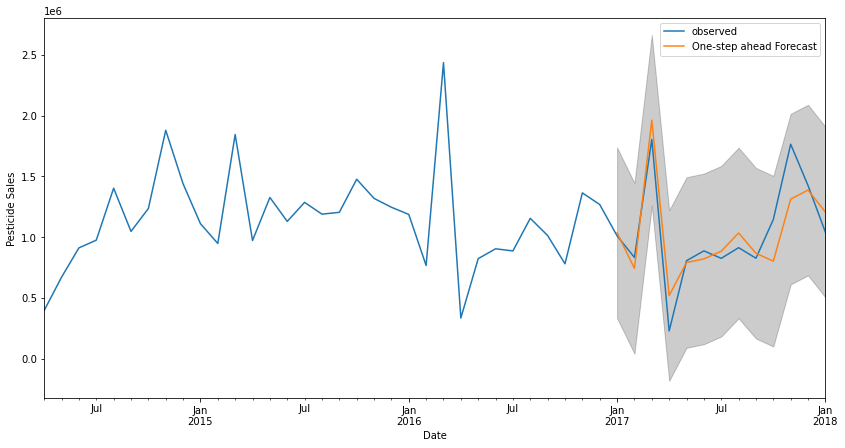

In [188]:
pred_All = results_All.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci_All = pred_All.conf_int()
ax = All['2014':].plot(label='observed')
pred_All.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=10, figsize=(14, 7))
ax.fill_between(pred_ci_All.index,
                pred_ci_All.iloc[:, 0],
                pred_ci_All.iloc[:, 1], color='k', alpha=.20)
ax.set_xlabel('Date')
ax.set_ylabel('Pesticide Sales')
plt.legend()
plt.show()

In [189]:
All_forecasted = pred_All.predicted_mean
All_truth = All['2017-01-01':]
mse = ((All_forecasted - All_truth)**2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 37889695094.87


In [190]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 3)))

The Root Mean Squared Error of our forecasts is 194652.755


In [191]:
mape_s_All = np.round(np.mean(np.abs(All_truth-All_forecasted)/All_truth)*100,2)

In [192]:
print(mape_s_All)

19.82


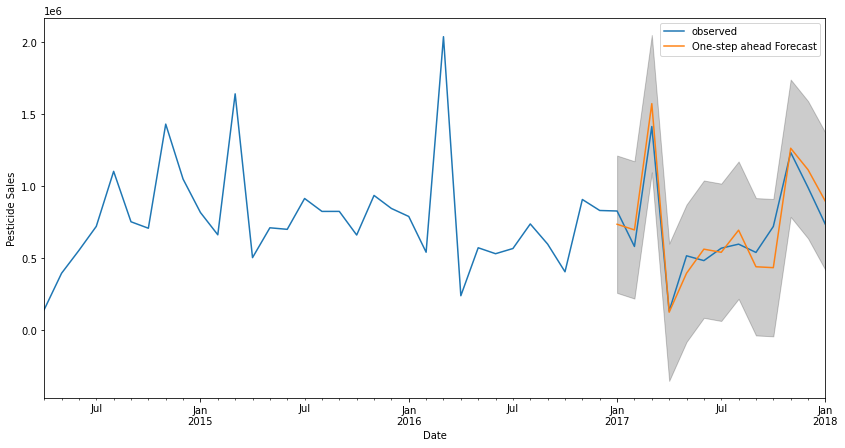

In [193]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=10, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.20)
ax.set_xlabel('Date')
ax.set_ylabel('Pesticide Sales')
plt.legend()
plt.show()

In [194]:
y_forecasted = pred.predicted_mean
y_truth = y['2016-07-01':]
mse = ((y_forecasted - y_truth)**2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 16311161277.48


In [195]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 3)))

The Root Mean Squared Error of our forecasts is 127715.157


In [196]:
mape_s = np.round(np.mean(np.abs(y_truth-y_forecasted)/y_truth)*100,2)

In [197]:
print(mape_s)

15.74


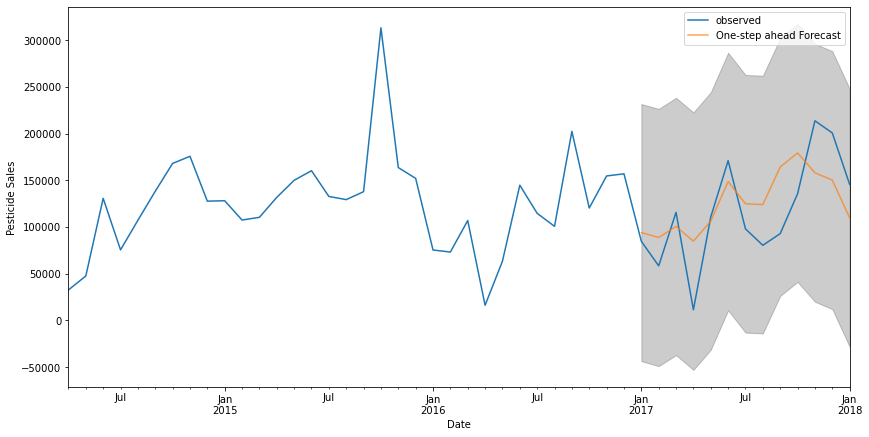

In [198]:
pred1 = results1.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci1 = pred1.conf_int()
ax = y1['2014':].plot(label='observed')
pred1.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci1.index,
                pred_ci1.iloc[:, 0],
                pred_ci1.iloc[:, 1], color='k', alpha=.20)
ax.set_xlabel('Date')
ax.set_ylabel('Pesticide Sales')
plt.legend()
plt.show()

In [199]:
y_forecasted1 = pred1.predicted_mean
y_truth1 = y1['2017-01-01':]
mse1 = ((y_forecasted1 - y_truth1)**2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse1, 2)))

The Mean Squared Error of our forecasts is 1824376588.94


In [200]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse1), 3)))

The Root Mean Squared Error of our forecasts is 42712.722


In [201]:
mape_s1 = np.round(np.mean(np.abs(y_truth1-y_forecasted1)/y_truth1)*100,2)
print(mape_s1)

77.65


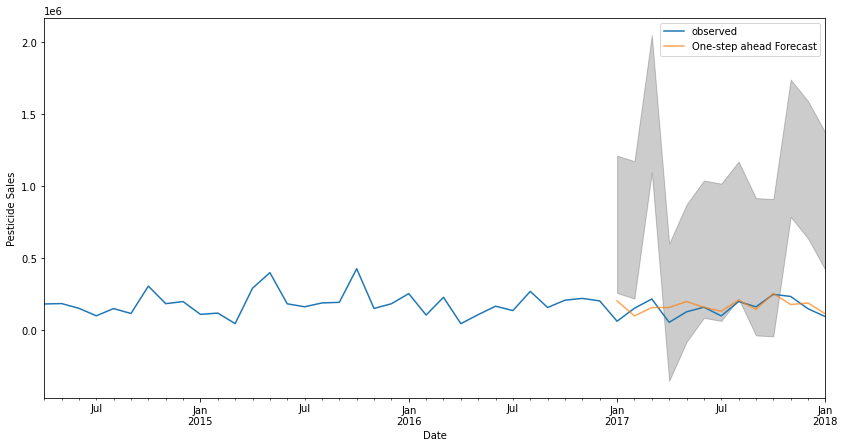

In [202]:
pred2 = results2.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci2 = pred.conf_int()
ax = y2['2014':].plot(label='observed')
pred2.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci2.index,
                pred_ci2.iloc[:, 0],
                pred_ci2.iloc[:, 1], color='k', alpha=.20)
ax.set_xlabel('Date')
ax.set_ylabel('Pesticide Sales')
plt.legend()
plt.show()

In [203]:
y_forecasted2 = pred2.predicted_mean
y_truth2 = y2['2017-01-01':]
mse2 = ((y_forecasted2 - y_truth2)**2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse2, 2)))

The Mean Squared Error of our forecasts is 3756855889.32


In [204]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse2), 3)))

The Root Mean Squared Error of our forecasts is 61293.196


In [205]:
mape_s2 = np.round(np.mean(np.abs(y_truth2-y_forecasted2)/y_truth2)*100,2)
print(mape_s2)

50.91


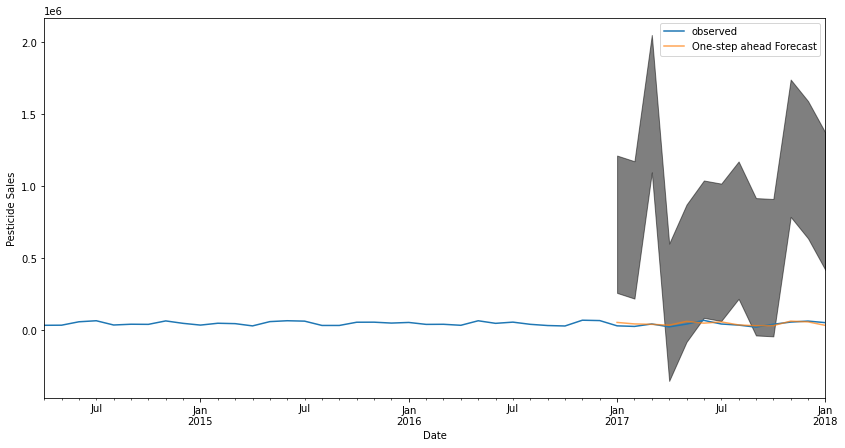

In [206]:
pred3 = results3.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci3 = pred.conf_int()
ax = y3['2014':].plot(label='observed')
pred3.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci3.index,
                pred_ci3.iloc[:, 0],
                pred_ci3.iloc[:, 1], color='k', alpha=.50)
ax.set_xlabel('Date')
ax.set_ylabel('Pesticide Sales')
plt.legend()
plt.show()

In [207]:
y_forecasted3 = pred3.predicted_mean
y_truth3 = y3['2017-01-01':]
mse3 = ((y_forecasted3 - y_truth3)**2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse3, 2)))

The Mean Squared Error of our forecasts is 197533174.16


In [208]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse3), 3)))

The Root Mean Squared Error of our forecasts is 14054.65


In [209]:
mape_s3 = np.round(np.mean(np.abs(y_truth3-y_forecasted3)/y_truth3)*100,2)

In [210]:
print(mape_s3)

34.08


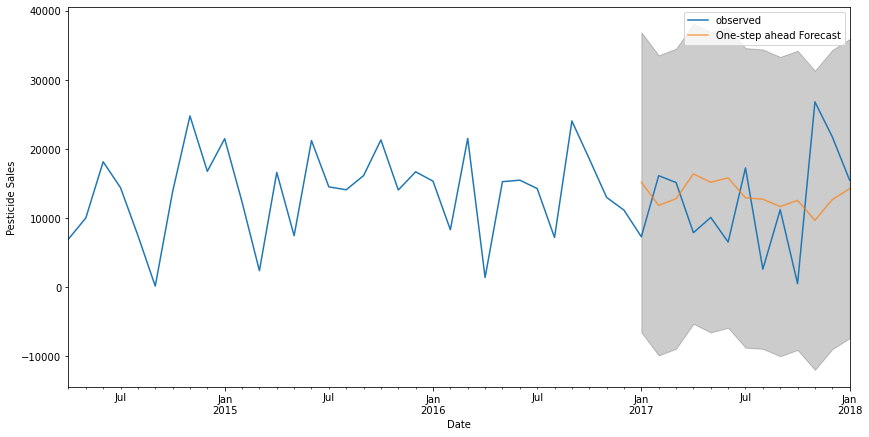

In [211]:
pred4 = results4.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci4 = pred4.conf_int()
ax = y4['2014':].plot(label='observed')
pred4.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci4.index,
                pred_ci4.iloc[:, 0],
                pred_ci4.iloc[:, 1], color='k', alpha=.20)
ax.set_xlabel('Date')
ax.set_ylabel('Pesticide Sales')
plt.legend()
plt.show()

In [212]:
y_forecasted4 = pred4.predicted_mean
y_truth4 = y4['2017-01-01':]
mse4 = ((y_forecasted4 - y_truth4)**2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse4, 2)))

The Mean Squared Error of our forecasts is 70471552.32


In [213]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse4), 3)))

The Root Mean Squared Error of our forecasts is 8394.734


In [214]:
mape_s4 = np.round(np.mean(np.abs(y_truth4-y_forecasted4)/y_truth4)*100,2)
print(mape_s4)

256.46


# Prediction for next 12 months

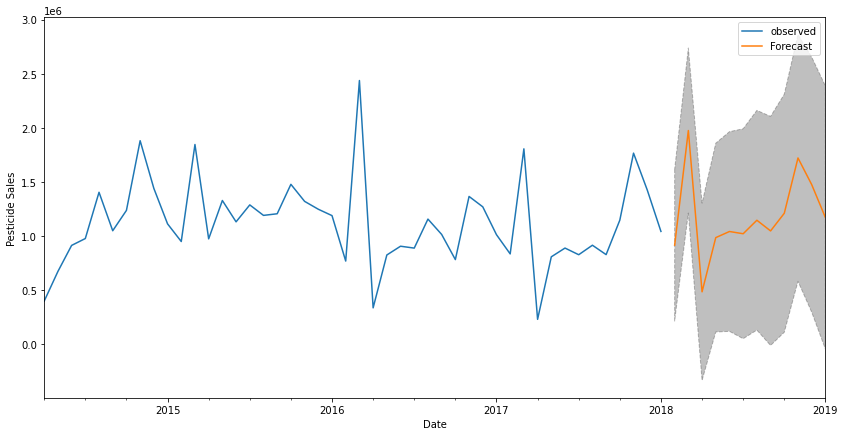

In [215]:
pred_uc_All = results_All.get_forecast(steps=12)
pred_ci_All = pred_uc_All.conf_int()
ax = All.plot(label='observed',figsize=(14, 7))
pred_uc_All.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci_All.index,
                pred_ci_All.iloc[:, 0],
                pred_ci_All.iloc[:, 1], color='k', alpha=.25,ls='--')
ax.set_xlabel('Date')
ax.set_ylabel('Pesticide Sales')
plt.legend()
plt.show()

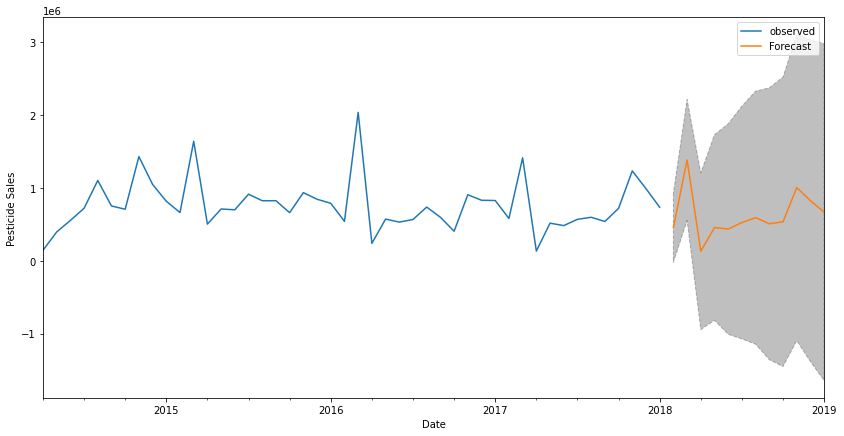

In [216]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed',figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25,ls='--')
ax.set_xlabel('Date')
ax.set_ylabel('Pesticide Sales')
plt.legend()
plt.show()

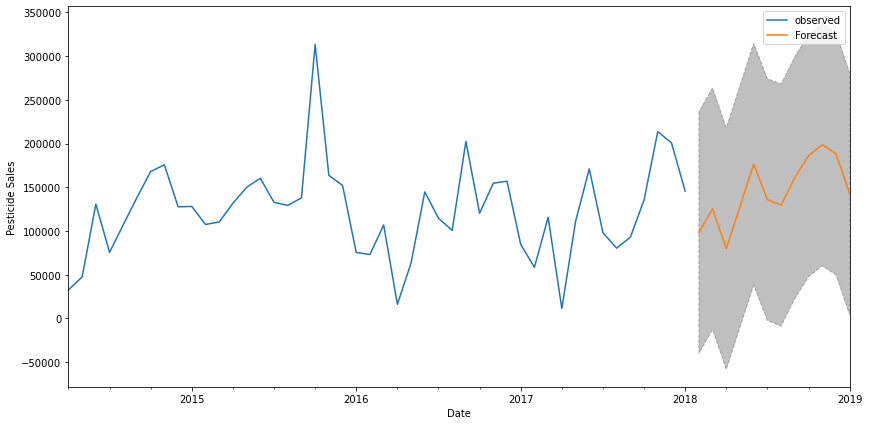

In [217]:
pred_uc1 = results1.get_forecast(steps=12)
pred_ci1 = pred_uc1.conf_int()
ax = y1.plot(label='observed',figsize=(14, 7))
pred_uc1.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci1.index,
                pred_ci1.iloc[:, 0],
                pred_ci1.iloc[:, 1], color='k', alpha=.25,ls='--')
ax.set_xlabel('Date')
ax.set_ylabel('Pesticide Sales')
plt.legend()
plt.show()

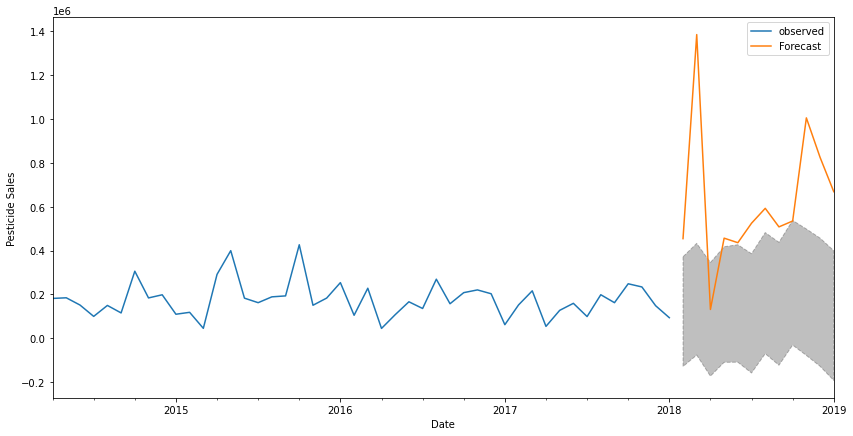

In [218]:
pred_uc2 = results2.get_forecast(steps=12)
pred_ci2 = pred_uc2.conf_int()
ax = y2.plot(label='observed',figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci2.index,
                pred_ci2.iloc[:, 0],
                pred_ci2.iloc[:, 1], color='k', alpha=.25,ls='--')
ax.set_xlabel('Date')
ax.set_ylabel('Pesticide Sales')
plt.legend()
plt.show()

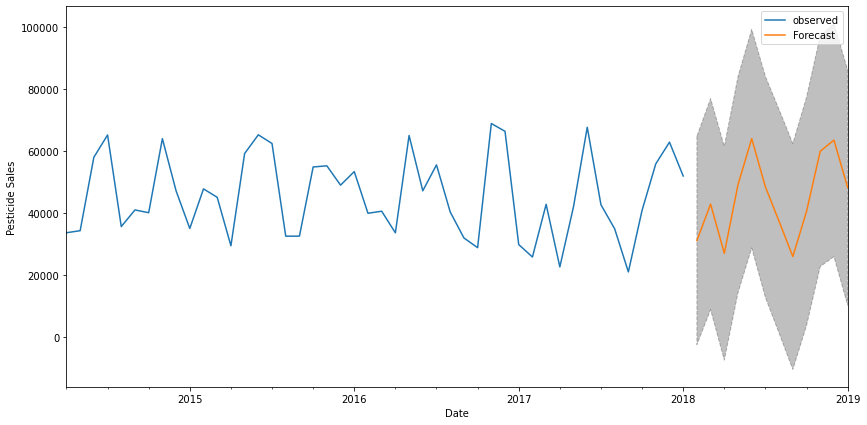

In [219]:
pred_uc3 = results3.get_forecast(steps=12)
pred_ci3 = pred_uc3.conf_int()
ax = y3.plot(label='observed',figsize=(14, 7))
pred_uc3.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci3.index,
                pred_ci3.iloc[:, 0],
                pred_ci3.iloc[:, 1], color='k', alpha=.25,ls='--')
ax.set_xlabel('Date')
ax.set_ylabel('Pesticide Sales')
plt.legend()
plt.show()

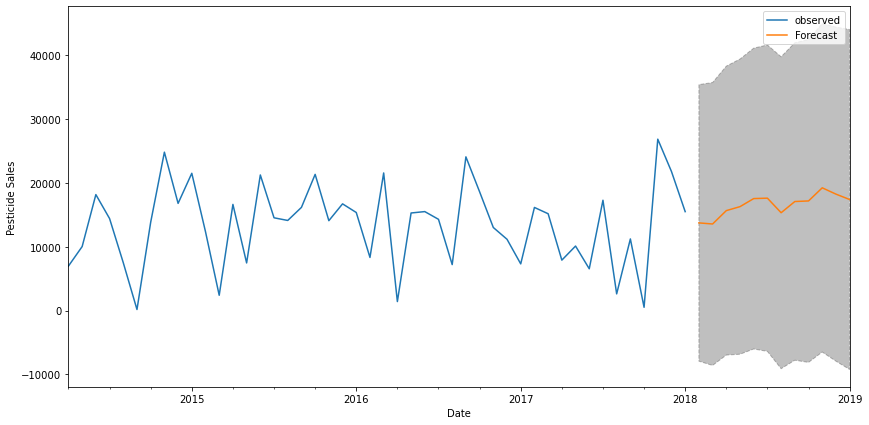

In [220]:
pred_uc4 = results4.get_forecast(steps=12)
pred_ci4 = pred_uc4.conf_int()
ax = y4.plot(label='observed',figsize=(14, 7))
pred_uc4.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci4.index,
                pred_ci4.iloc[:, 0],
                pred_ci4.iloc[:, 1], color='k', alpha=.25,ls='--')
ax.set_xlabel('Date')
ax.set_ylabel('Pesticide Sales')
plt.legend()
plt.show()

In [221]:
# The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well

In [222]:
# print(pred_uc4 = results4.get_forecast(steps=12))

In [223]:
# pd.pred_uc4('display.max_rows', 10)

# visualizing forecasts

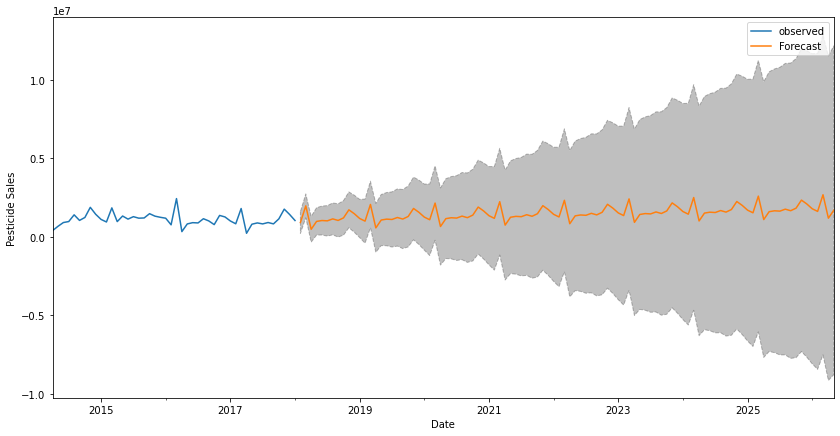

In [224]:
pred_uc_All = results_All.get_forecast(steps=100)
pred_ci_All = pred_uc_All.conf_int()
ax = All.plot(label='observed',figsize=(14, 7))
pred_uc_All.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci_All.index,
                pred_ci_All.iloc[:, 0],
                pred_ci_All.iloc[:, 1], color='k', alpha=.25,ls='--')
ax.set_xlabel('Date')
ax.set_ylabel('Pesticide Sales')
plt.legend()
plt.show()

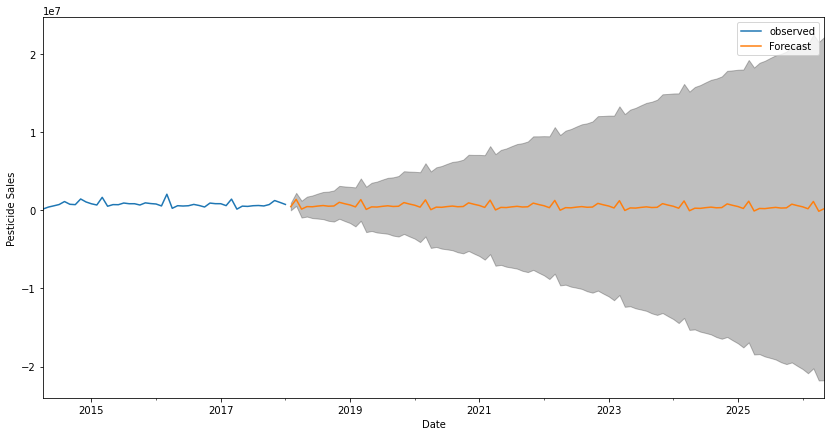

In [225]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Pesticide Sales')
plt.legend()
plt.show()

In [226]:
# There is an upward trend in sales in the coming years.